In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [2]:
columns = ['strength', 'pa', 'num_images', 'pos_rms', 'mag_rms', 't_mpole_str', 't_mpole_pa', 'chi2', 'z', 'x', 'y', 'e', 'pow_pa', 'r_ein', 'pwi']
df = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/Test/Sim 9_summary.csv', header=None, names=columns, skiprows=1) 
df

strength         pa  num_images  pos_rms  mag_rms  t_mpole_str  \
0          0.001    0.00000           6      NaN      NaN     0.048841   
1          0.001    0.36036           6      NaN      NaN     0.045787   
2          0.001    0.72072           6      NaN      NaN     0.047858   
3          0.001    1.08108           6      NaN      NaN     0.051795   
4          0.001    1.44144           6      NaN      NaN     0.051984   
...          ...        ...         ...      ...      ...          ...   
999995     0.100  358.55856           6      NaN      NaN     0.049983   
999996     0.100  358.91892           6      NaN      NaN     0.055786   
999997     0.100  359.27928           6      NaN      NaN     0.058638   
999998     0.100  359.63964           6      NaN      NaN     0.055058   
999999     0.100  360.00000           6      NaN      NaN     0.057739   

        t_mpole_pa      chi2    z         x         y         e    pow_pa  \
0        -5.419818  0.000003  1.0  20.80676  20.80012  0.006620  53.01982   
1        -5.412390  0.000003  1.0  20.80668  20.80055  0.006476  56.32485   
2        -5.411408  0.000002  1.0  20.80675  20.80048  0.006918  57.11508   
3        -5.403722  0.000003  1.0  20.80686  20.80055  0.008296  60.90463   
4        -5.404310  0.000002  1.0  20.80687  20.80052  0.008283  60.67474   
...            ...       ...  ...       ...       ...       ...       ...   
999995  354.521700  0.000002  1.0  20.80673  20.79817  0.008469  21.49576   
999996  354.509300  0.000002  1.0  20.80685  20.79775  0.010966  18.08949   
999997  354.513000  0.000002  1.0  20.80691  20.79782  0.011203  19.33842   
999998  354.517300  0.000002  1.0  20.80684  20.79797  0.009886  20.47562   
999999  354.521600  0.000002  1.0  20.80690  20.79805  0.009988  22.20049   

           r_ein       pwi  
0       0.478060  2.127577  
1       0.478034  2.067627  
2       0.477996  2.104173  
3       0.477880  2.167540  
4       0.477885  2.171277  
...          ...       ...  
999995  0.478515  2.185391  
999996  0.478472  2.286678  
999997  0.478391  2.328787  
999998  0.478436  2.270859  
999999  0.478355  2.310451  

[1000000 rows x 15 columns]

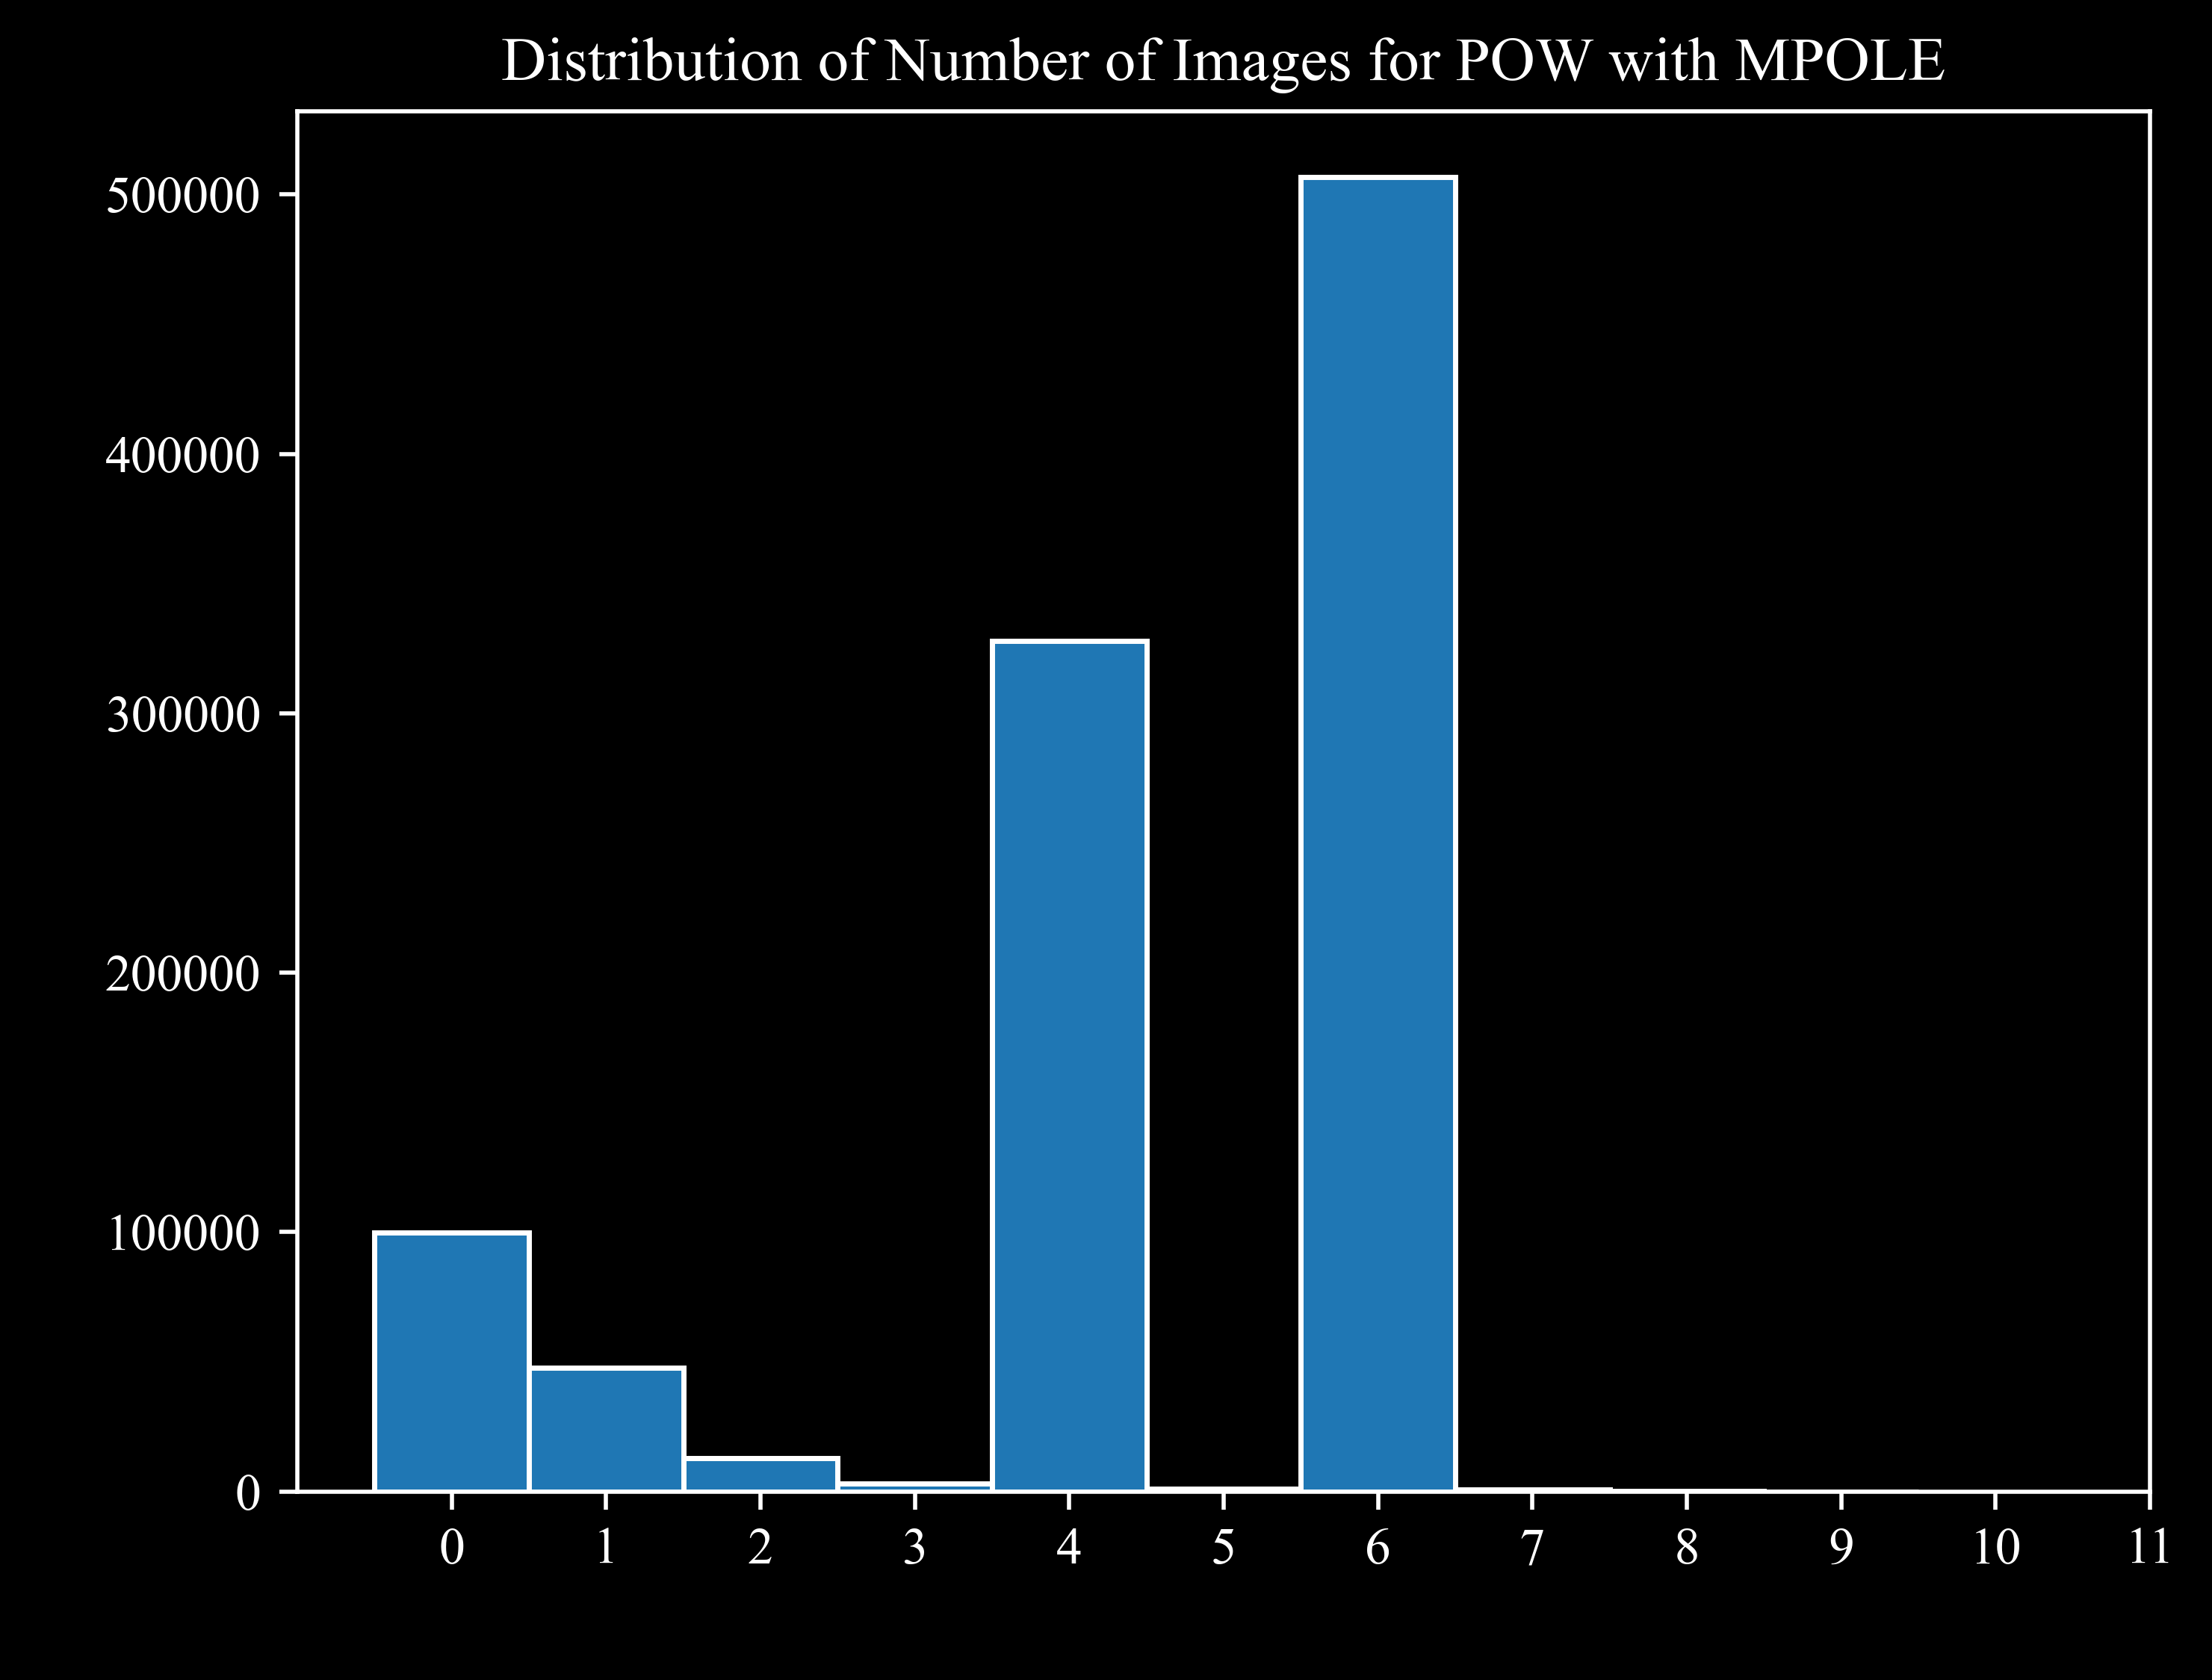

In [3]:
plt.hist(df['num_images'], bins=range(0, 11), align='left', edgecolor='w')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Images for POW with MPOLE')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.show()

In [4]:
mask = df['num_images'] == 4
filtered_df_0 = df[mask]
filtered_df_0 = filtered_df_0.reset_index(drop=True)

# Precentage of 4 image models 
percentage_4_images = (len(filtered_df_0) / len(df)) * 100
print(f"Percentage of 4 image models: {percentage_4_images:.2f}%")

Percentage of 4 image models: 32.78%


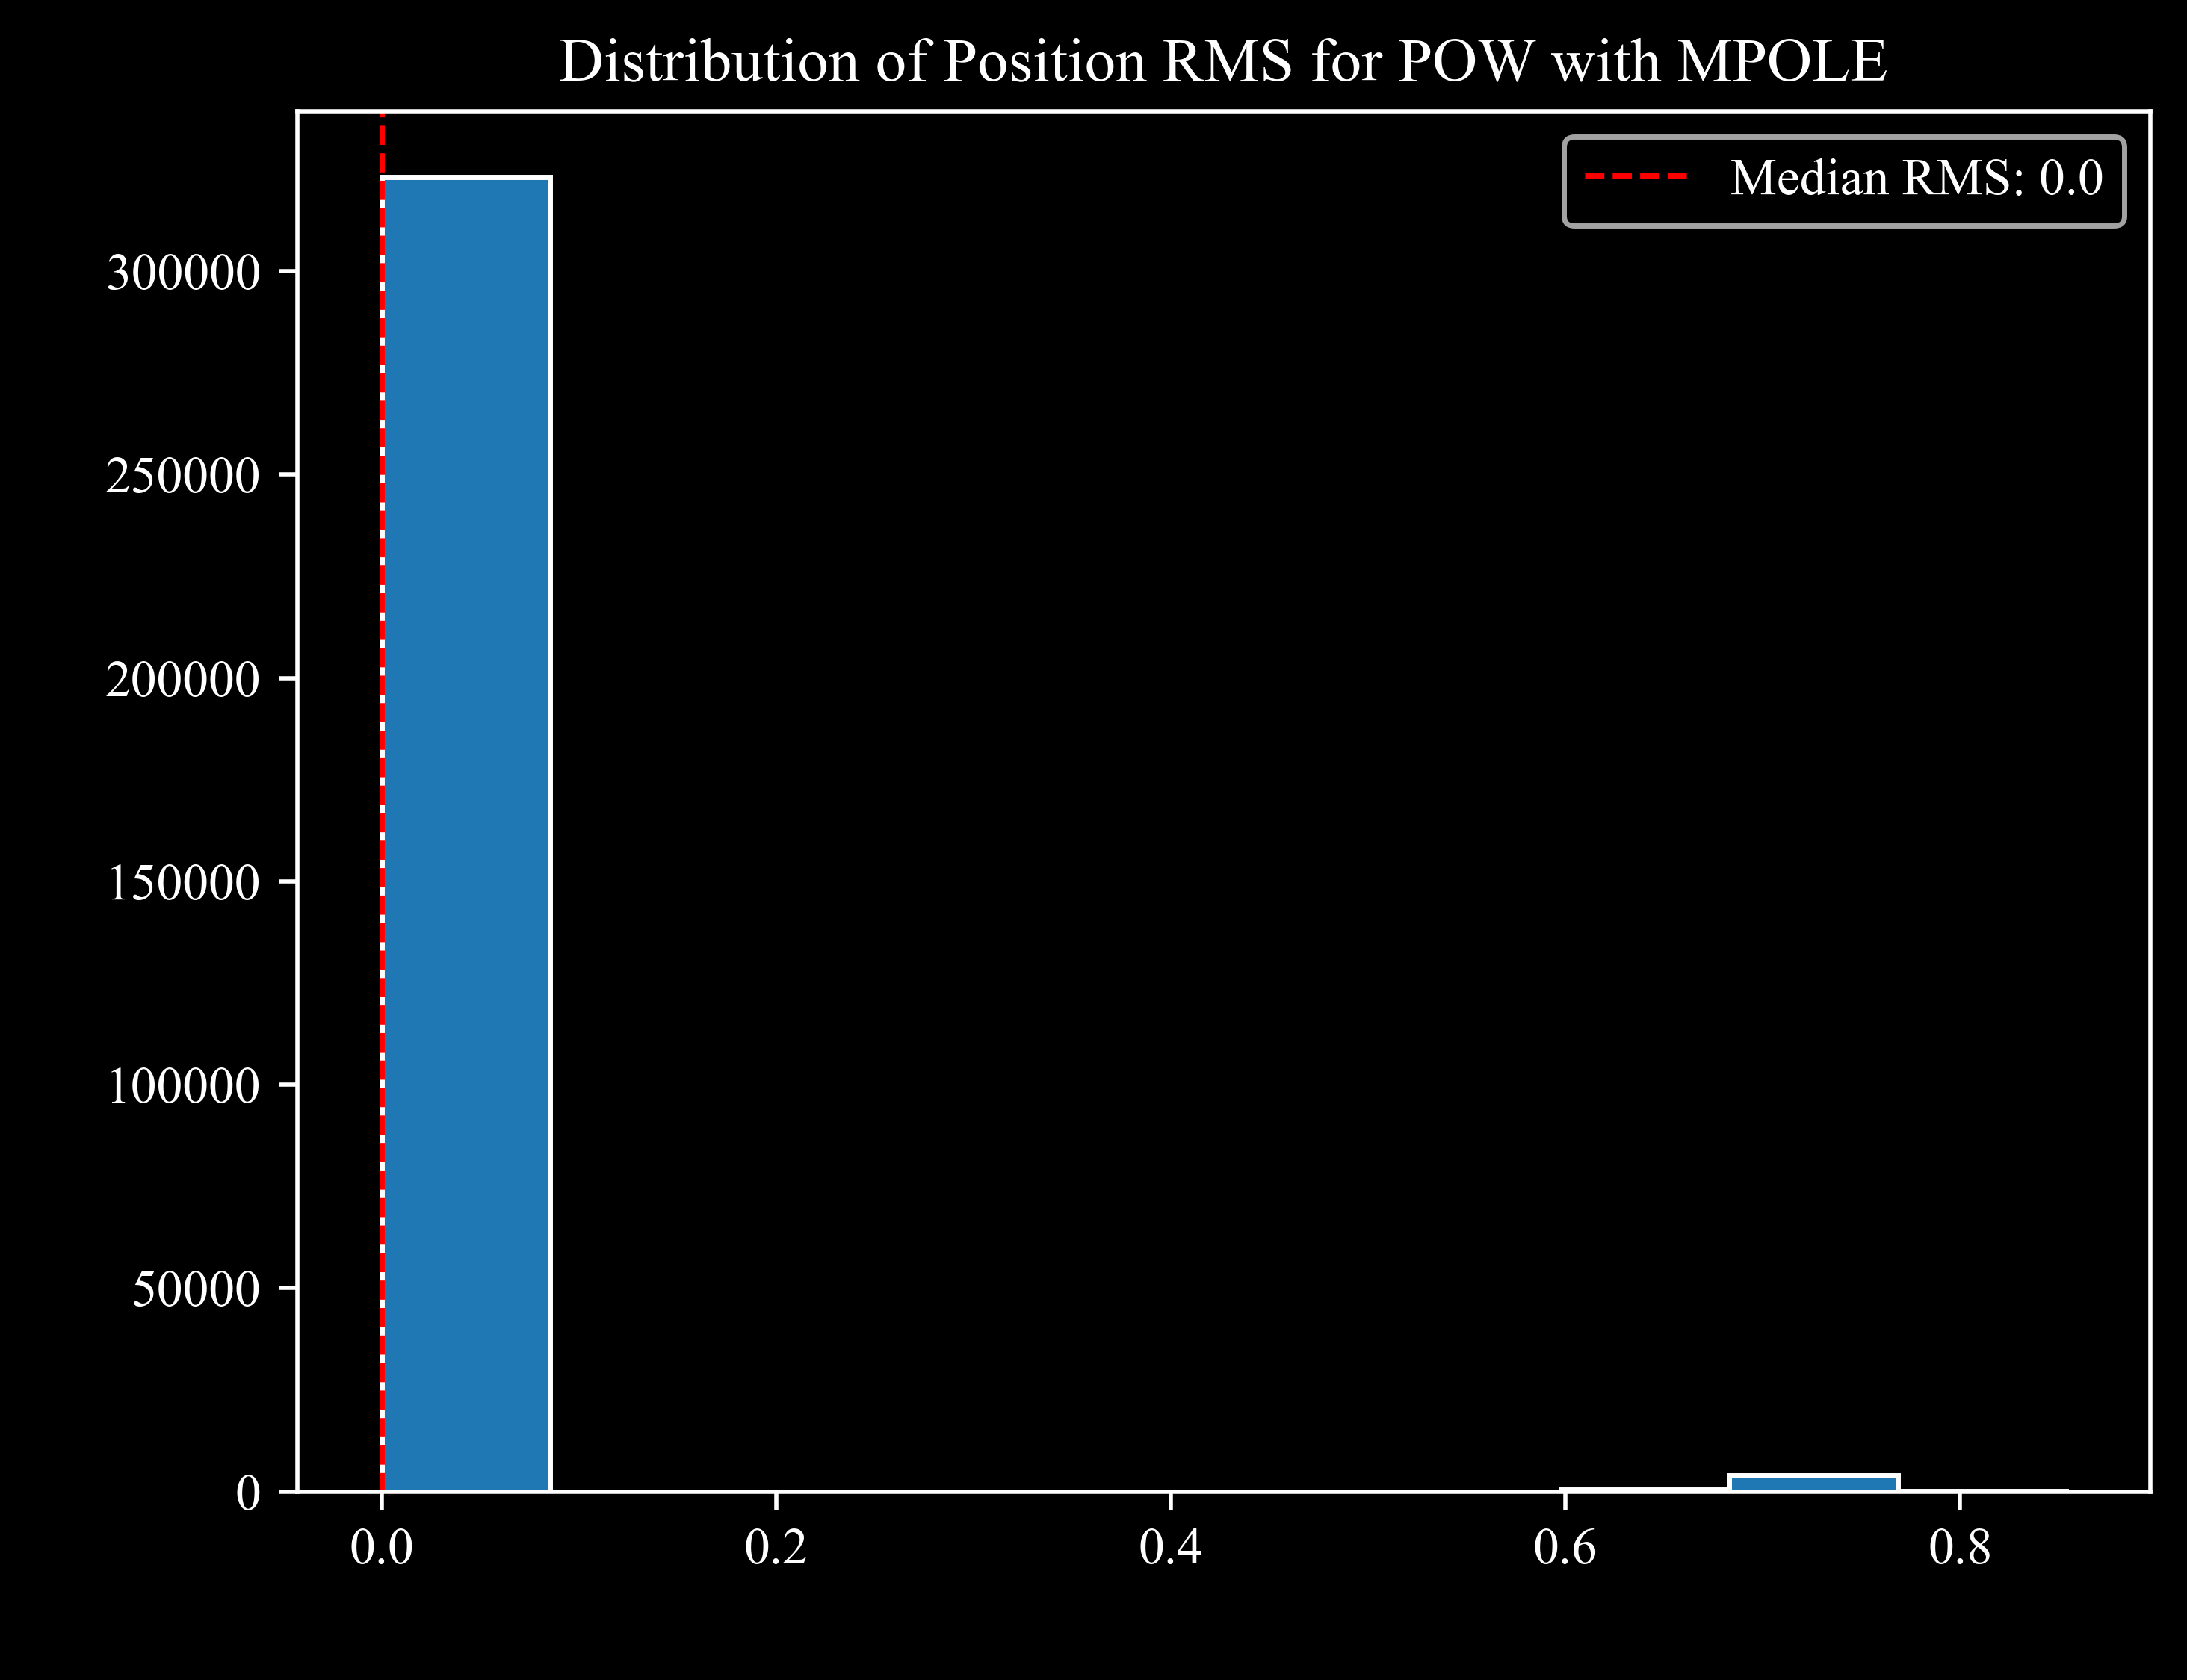

In [5]:
plt.hist(filtered_df_0['pos_rms'], bins=10, edgecolor='w')
plt.axvline(filtered_df_0['pos_rms'].median(), color='r', linestyle='dashed', linewidth=1, label='Median RMS: ' + str(round(filtered_df_0['pos_rms'].median(), 4)))
plt.xlabel('Position RMS')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Position RMS for POW with MPOLE')
plt.show()

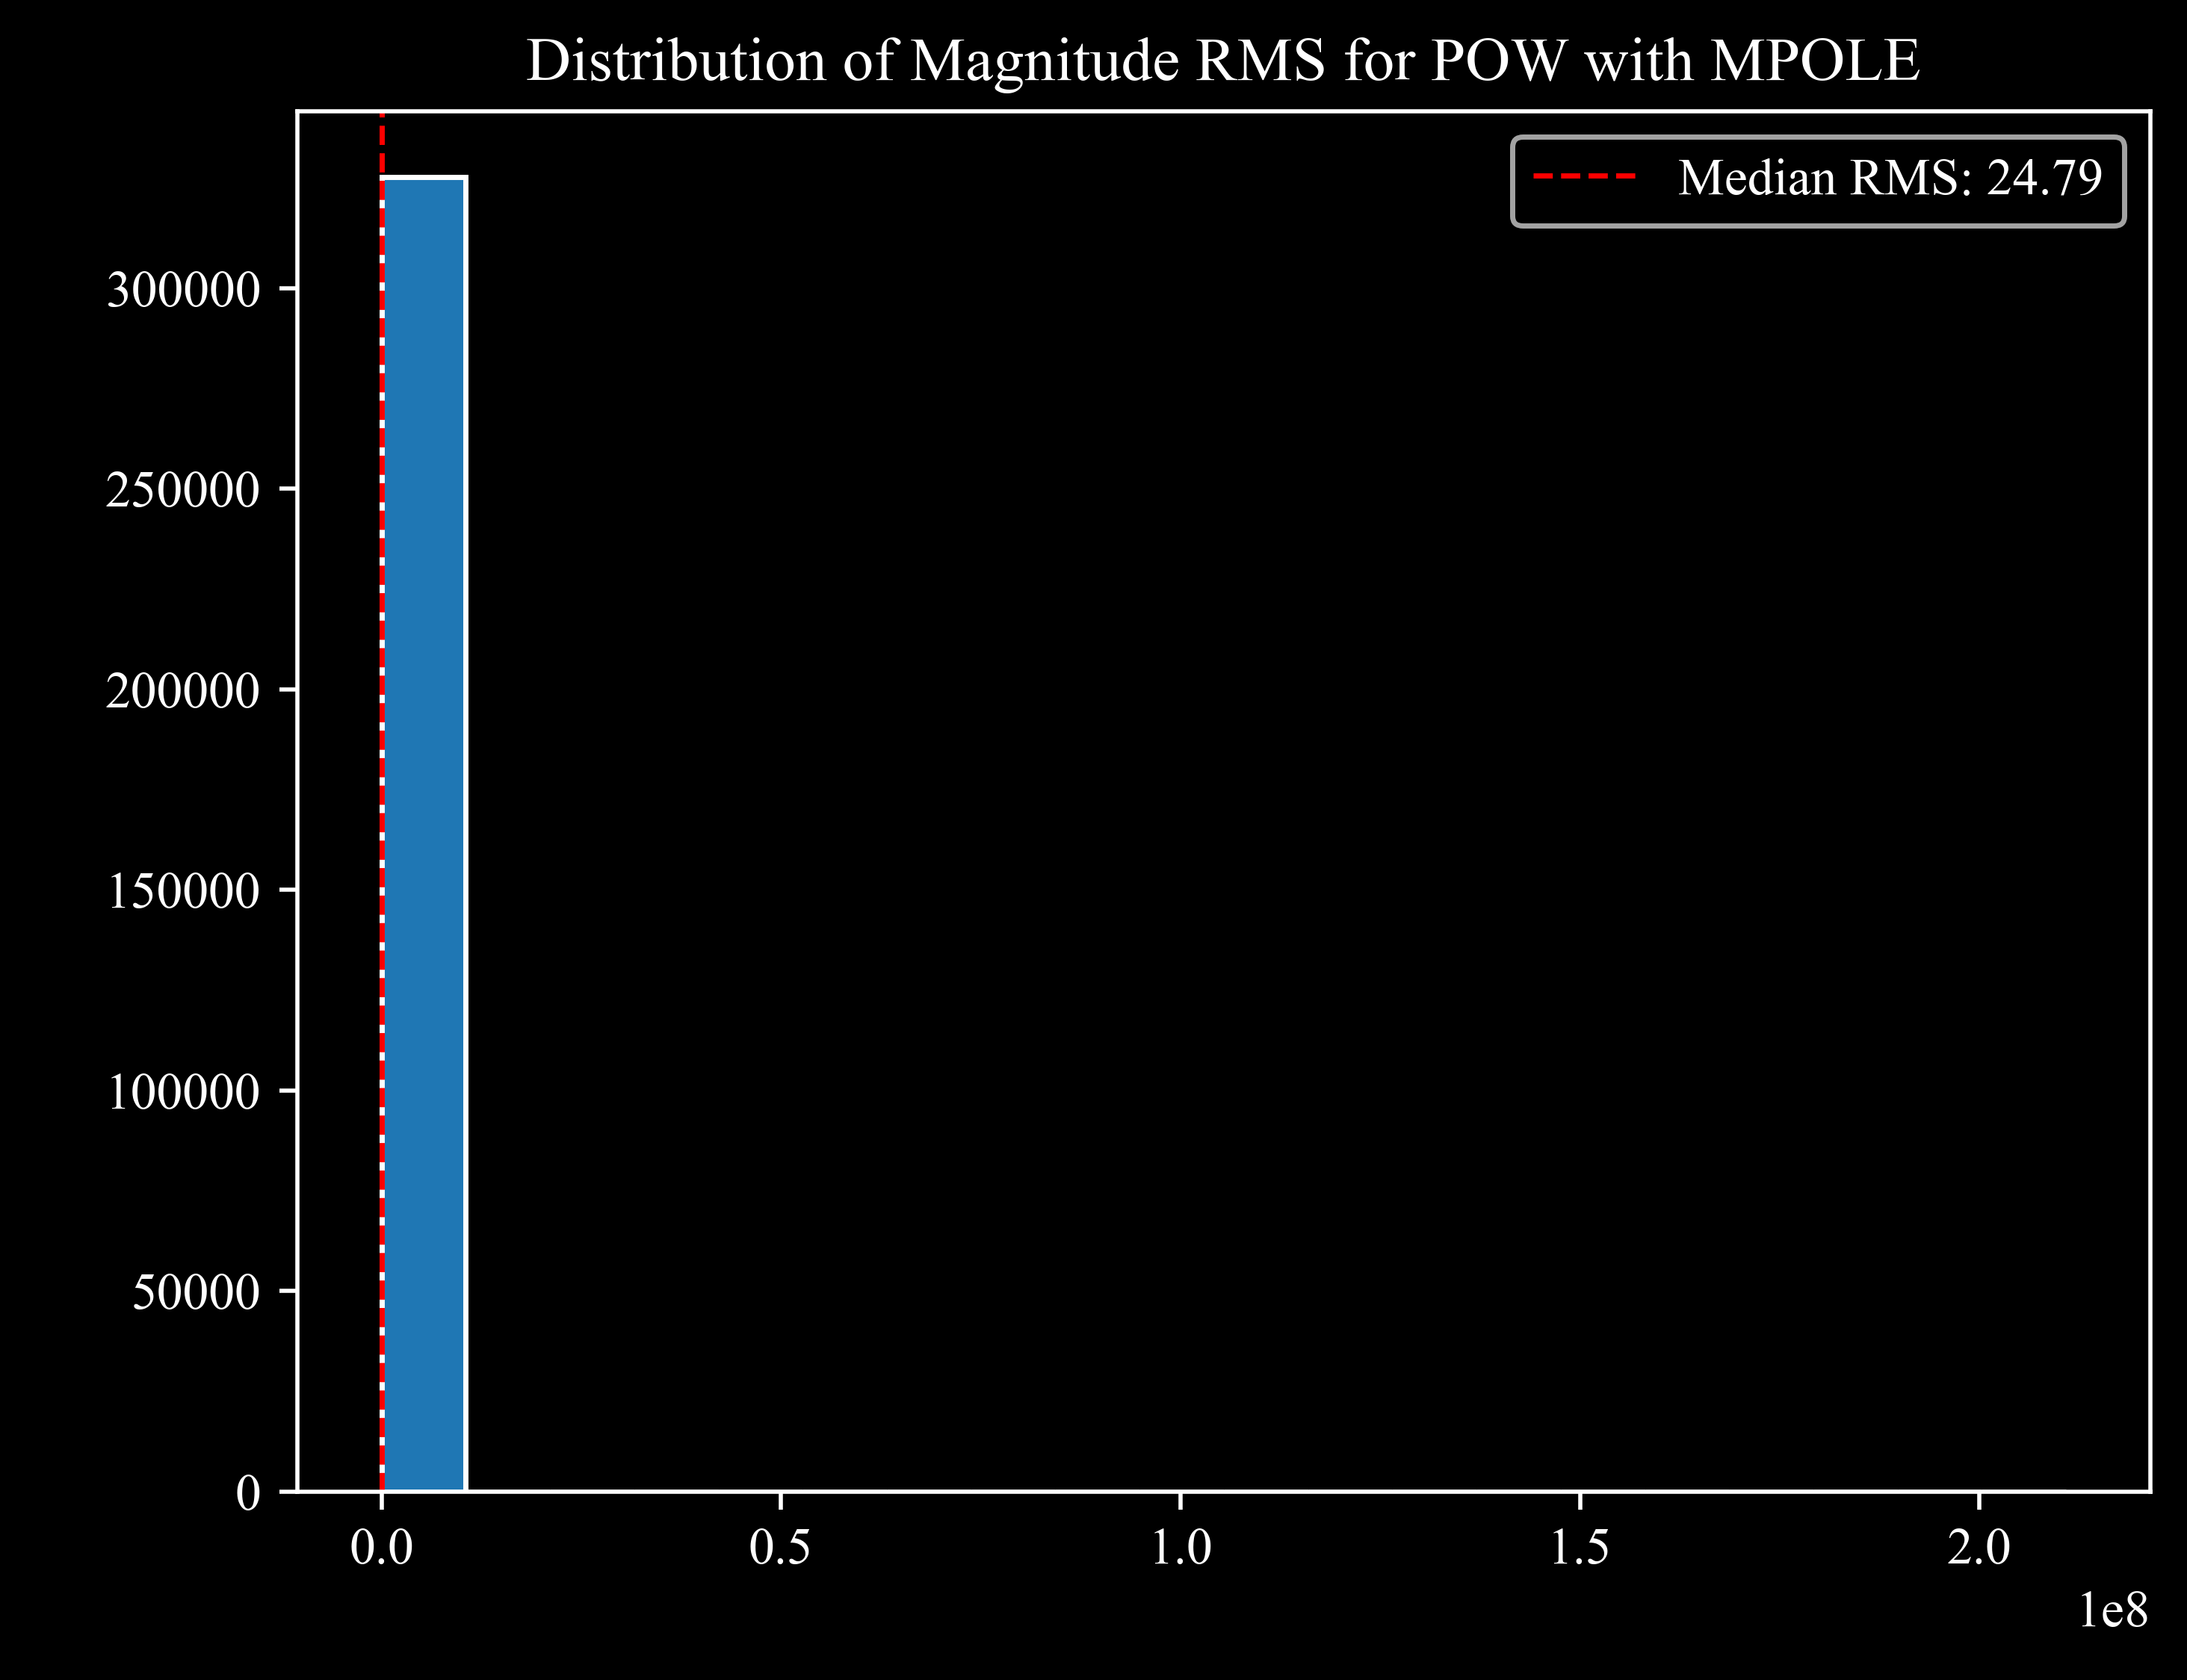

In [6]:
plt.hist(filtered_df_0['mag_rms'], bins=20, edgecolor='w')
plt.axvline(filtered_df_0['mag_rms'].median(), color='r', linestyle='dashed', linewidth=1, label='Median RMS: ' + str(round(filtered_df_0['mag_rms'].median(), 2)))
plt.xlabel('Magnitude RMS')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Magnitude RMS for POW with MPOLE')
plt.show()

In [7]:
mask2 = filtered_df_0['pos_rms']  == 3.101229586803652e-05
filtered_df = filtered_df_0[mask2]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

strength         pa  num_images   pos_rms     mag_rms  t_mpole_str  \
0          0.001   24.50450           4  0.000031    9.424750     0.017412   
1          0.001   25.58559           4  0.000031   49.111325     0.002643   
2          0.001   29.90991           4  0.000031  117.332900     0.002379   
3          0.001   30.27027           4  0.000031   51.301800     0.002762   
4          0.001   33.15315           4  0.000031    3.640250     0.008912   
...          ...        ...         ...       ...         ...          ...   
305216     0.100  313.15315           4  0.000031    2.891100     0.005937   
305217     0.100  313.51351           4  0.000031    4.904250     0.017484   
305218     0.100  319.27928           4  0.000031   10.375325     0.035915   
305219     0.100  331.89189           4  0.000031    2.464125     0.004884   
305220     0.100  334.41441           4  0.000031    8.289100     0.021268   

        t_mpole_pa      chi2    z         x         y         e      pow_pa  \
0        -7.174206  0.000003  1.0  20.80507  20.77524  0.083739   -2.130535   
1       110.254800  0.000002  1.0  20.80497  20.76975  0.035805   -2.595834   
2       299.939700  0.000003  1.0  20.80491  20.76186  0.040707 -183.167700   
3       110.621300  0.000002  1.0  20.80498  20.77015  0.034416   -2.567598   
4        99.310200  0.000003  1.0  20.80306  20.75323  0.318450   -2.668867   
...            ...       ...  ...       ...       ...       ...         ...   
305216  333.989700  0.000001  1.0  20.80325  20.75369  0.260961   -2.720312   
305217  306.868100  0.000001  1.0  20.80119  20.73326  0.486405   -2.696357   
305218  353.207600  0.000002  1.0  20.80534  20.77901  0.137456   -1.933808   
305219  314.105000  0.000002  1.0  20.80334  20.75251  0.210036   -2.818841   
305220  352.895400  0.000002  1.0  20.80511  20.77586  0.097437   -2.098694   

           r_ein       pwi  
0       0.485640  2.034706  
1       0.489017  1.544807  
2       0.492192  1.500317  
3       0.488901  1.534682  
4       0.491912  2.376131  
...          ...       ...  
305216  0.491819  2.285340  
305217  0.500749  2.426445  
305218  0.483549  2.353275  
305219  0.492614  2.163834  
305220  0.485174  2.122991  

[305221 rows x 15 columns]

In [8]:
# Percentage Calc
num_goodfit = len(filtered_df)
num_total = len(df[df['num_images'] == 4])
percentage_goodfit = (num_goodfit / num_total) * 100
print(f"Percentage of good fits out of 4 image models: {percentage_goodfit:.2f}%")

num_goodfit = len(filtered_df)
num_total = len(df)
percentage_goodfit = (num_goodfit / num_total) * 100
print(f"Percentage of good fits: {percentage_goodfit:.2f}%")

Percentage of good fits out of 4 image models: 93.11%
Percentage of good fits: 30.52%


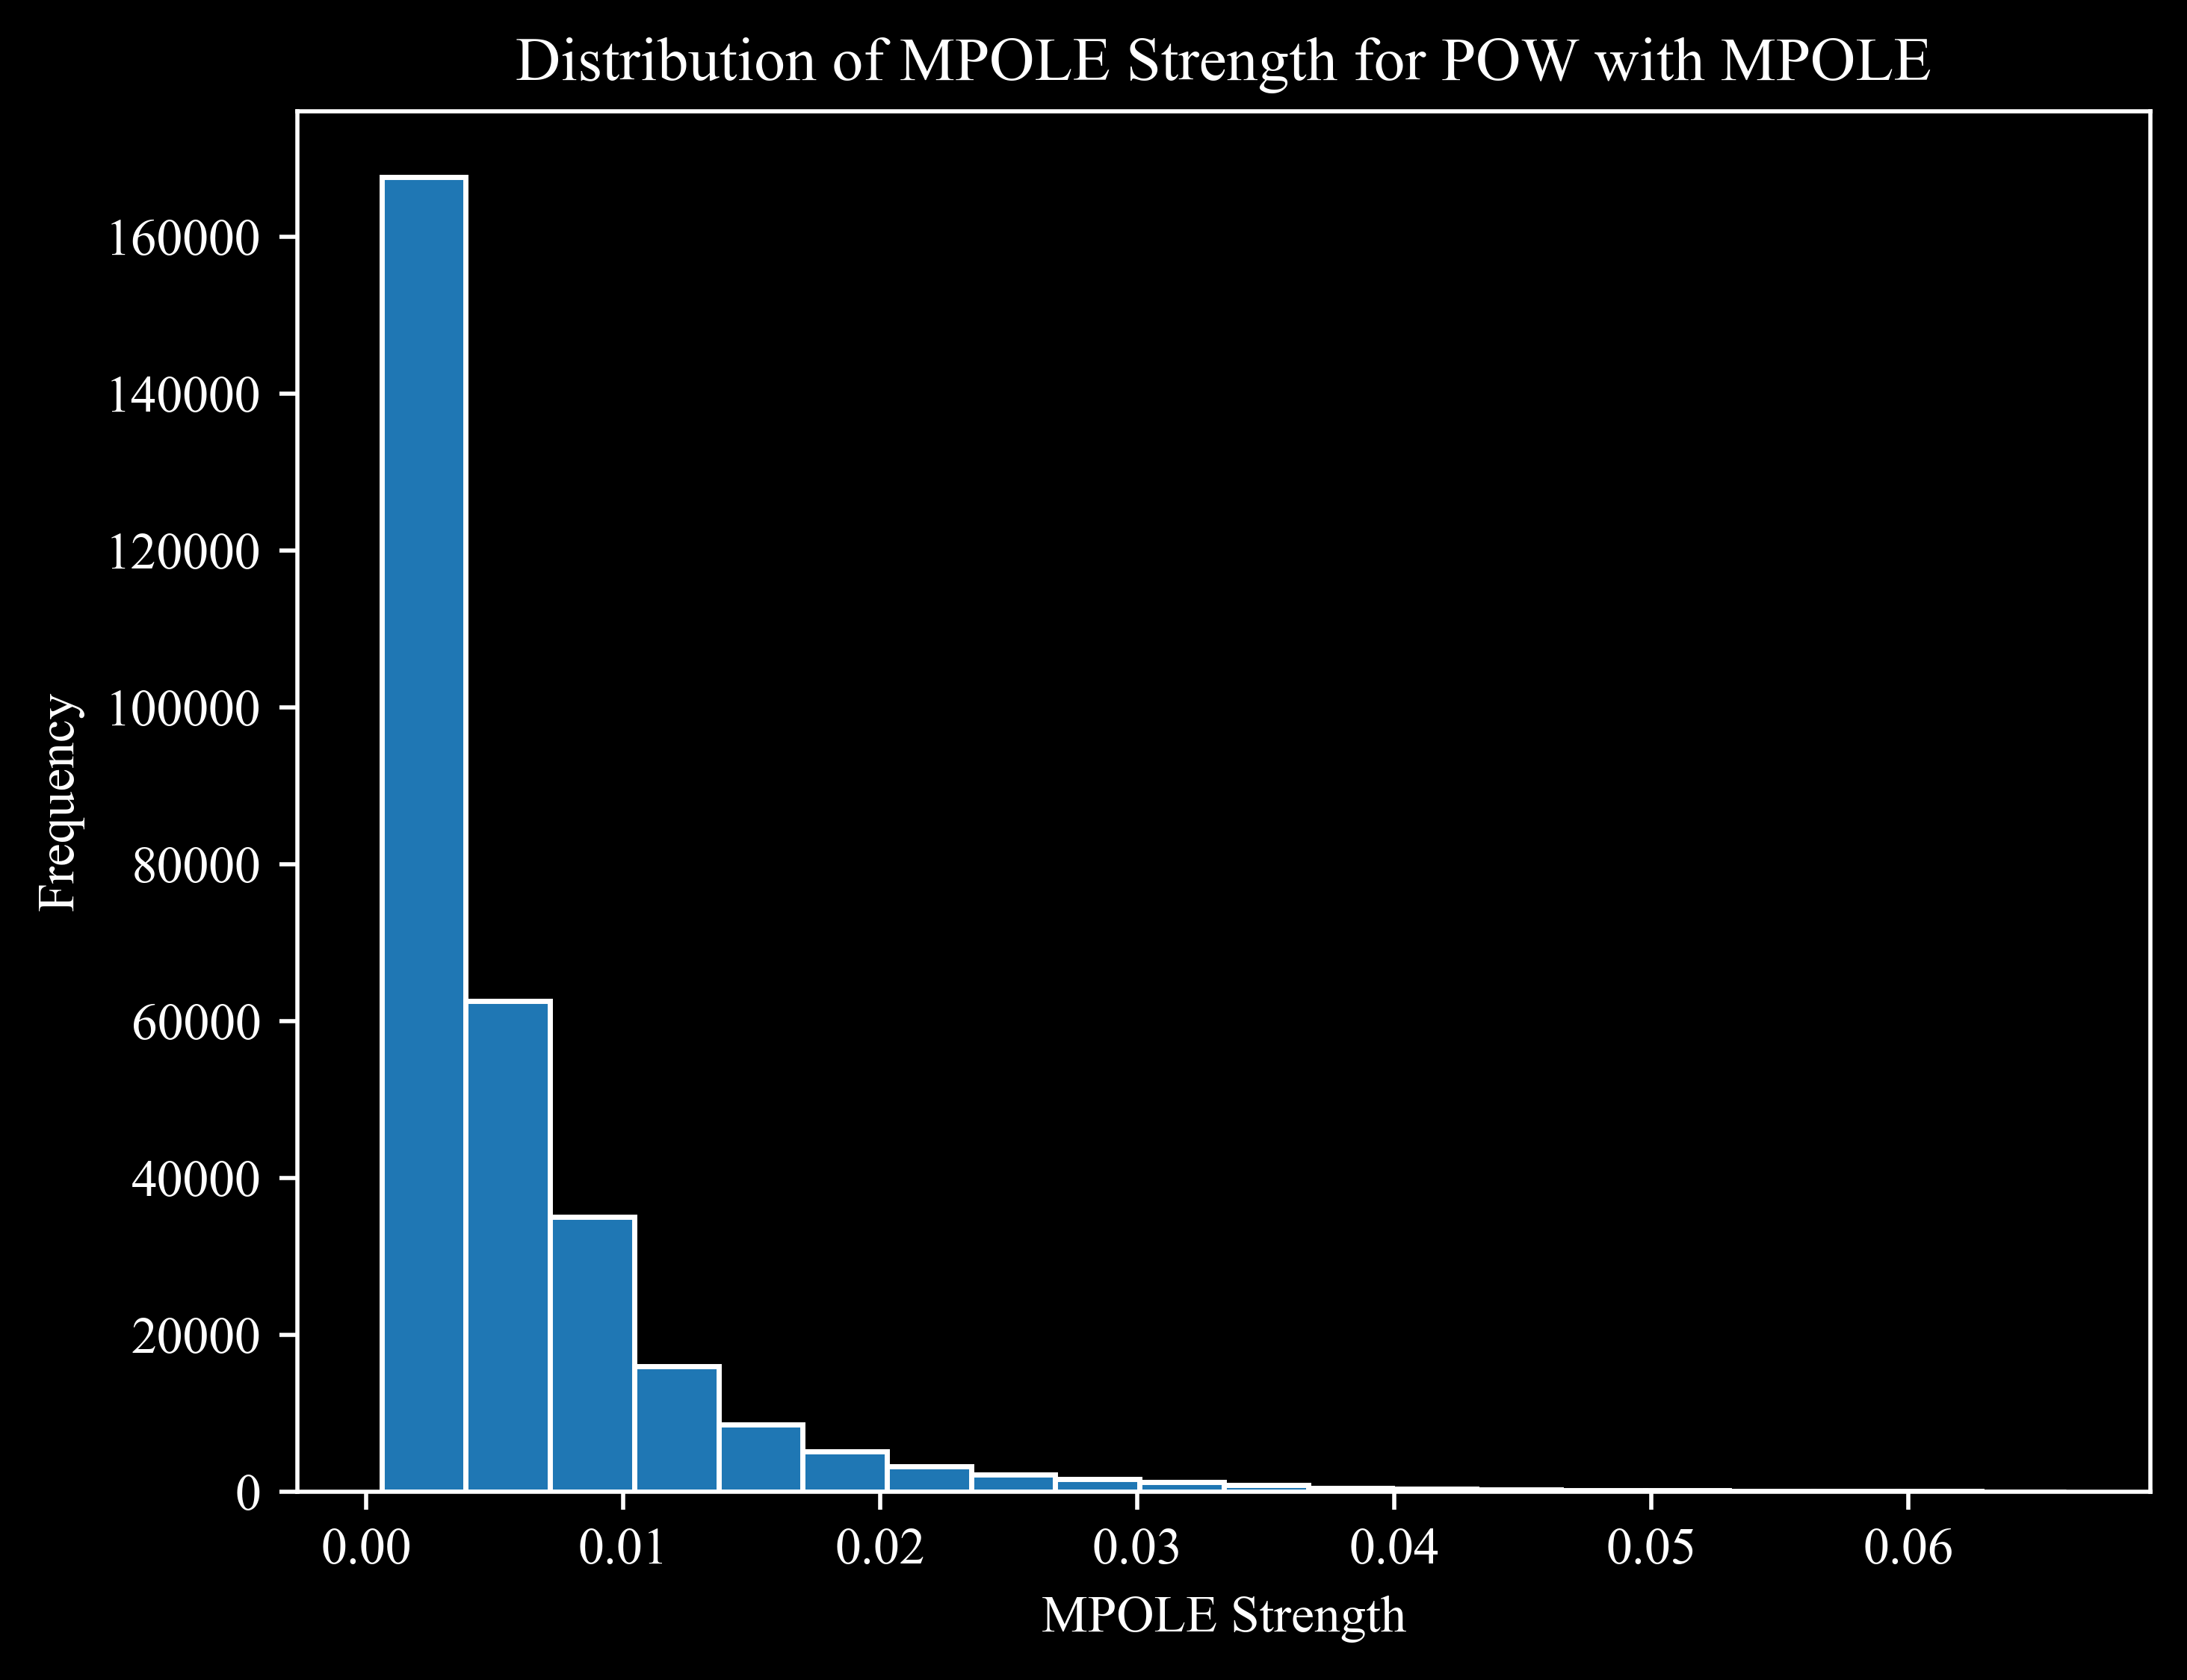

In [9]:
plt.hist(filtered_df['t_mpole_str'], bins=20, edgecolor='w')
plt.xlabel('MPOLE Strength', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of MPOLE Strength for POW with MPOLE')
plt.show()

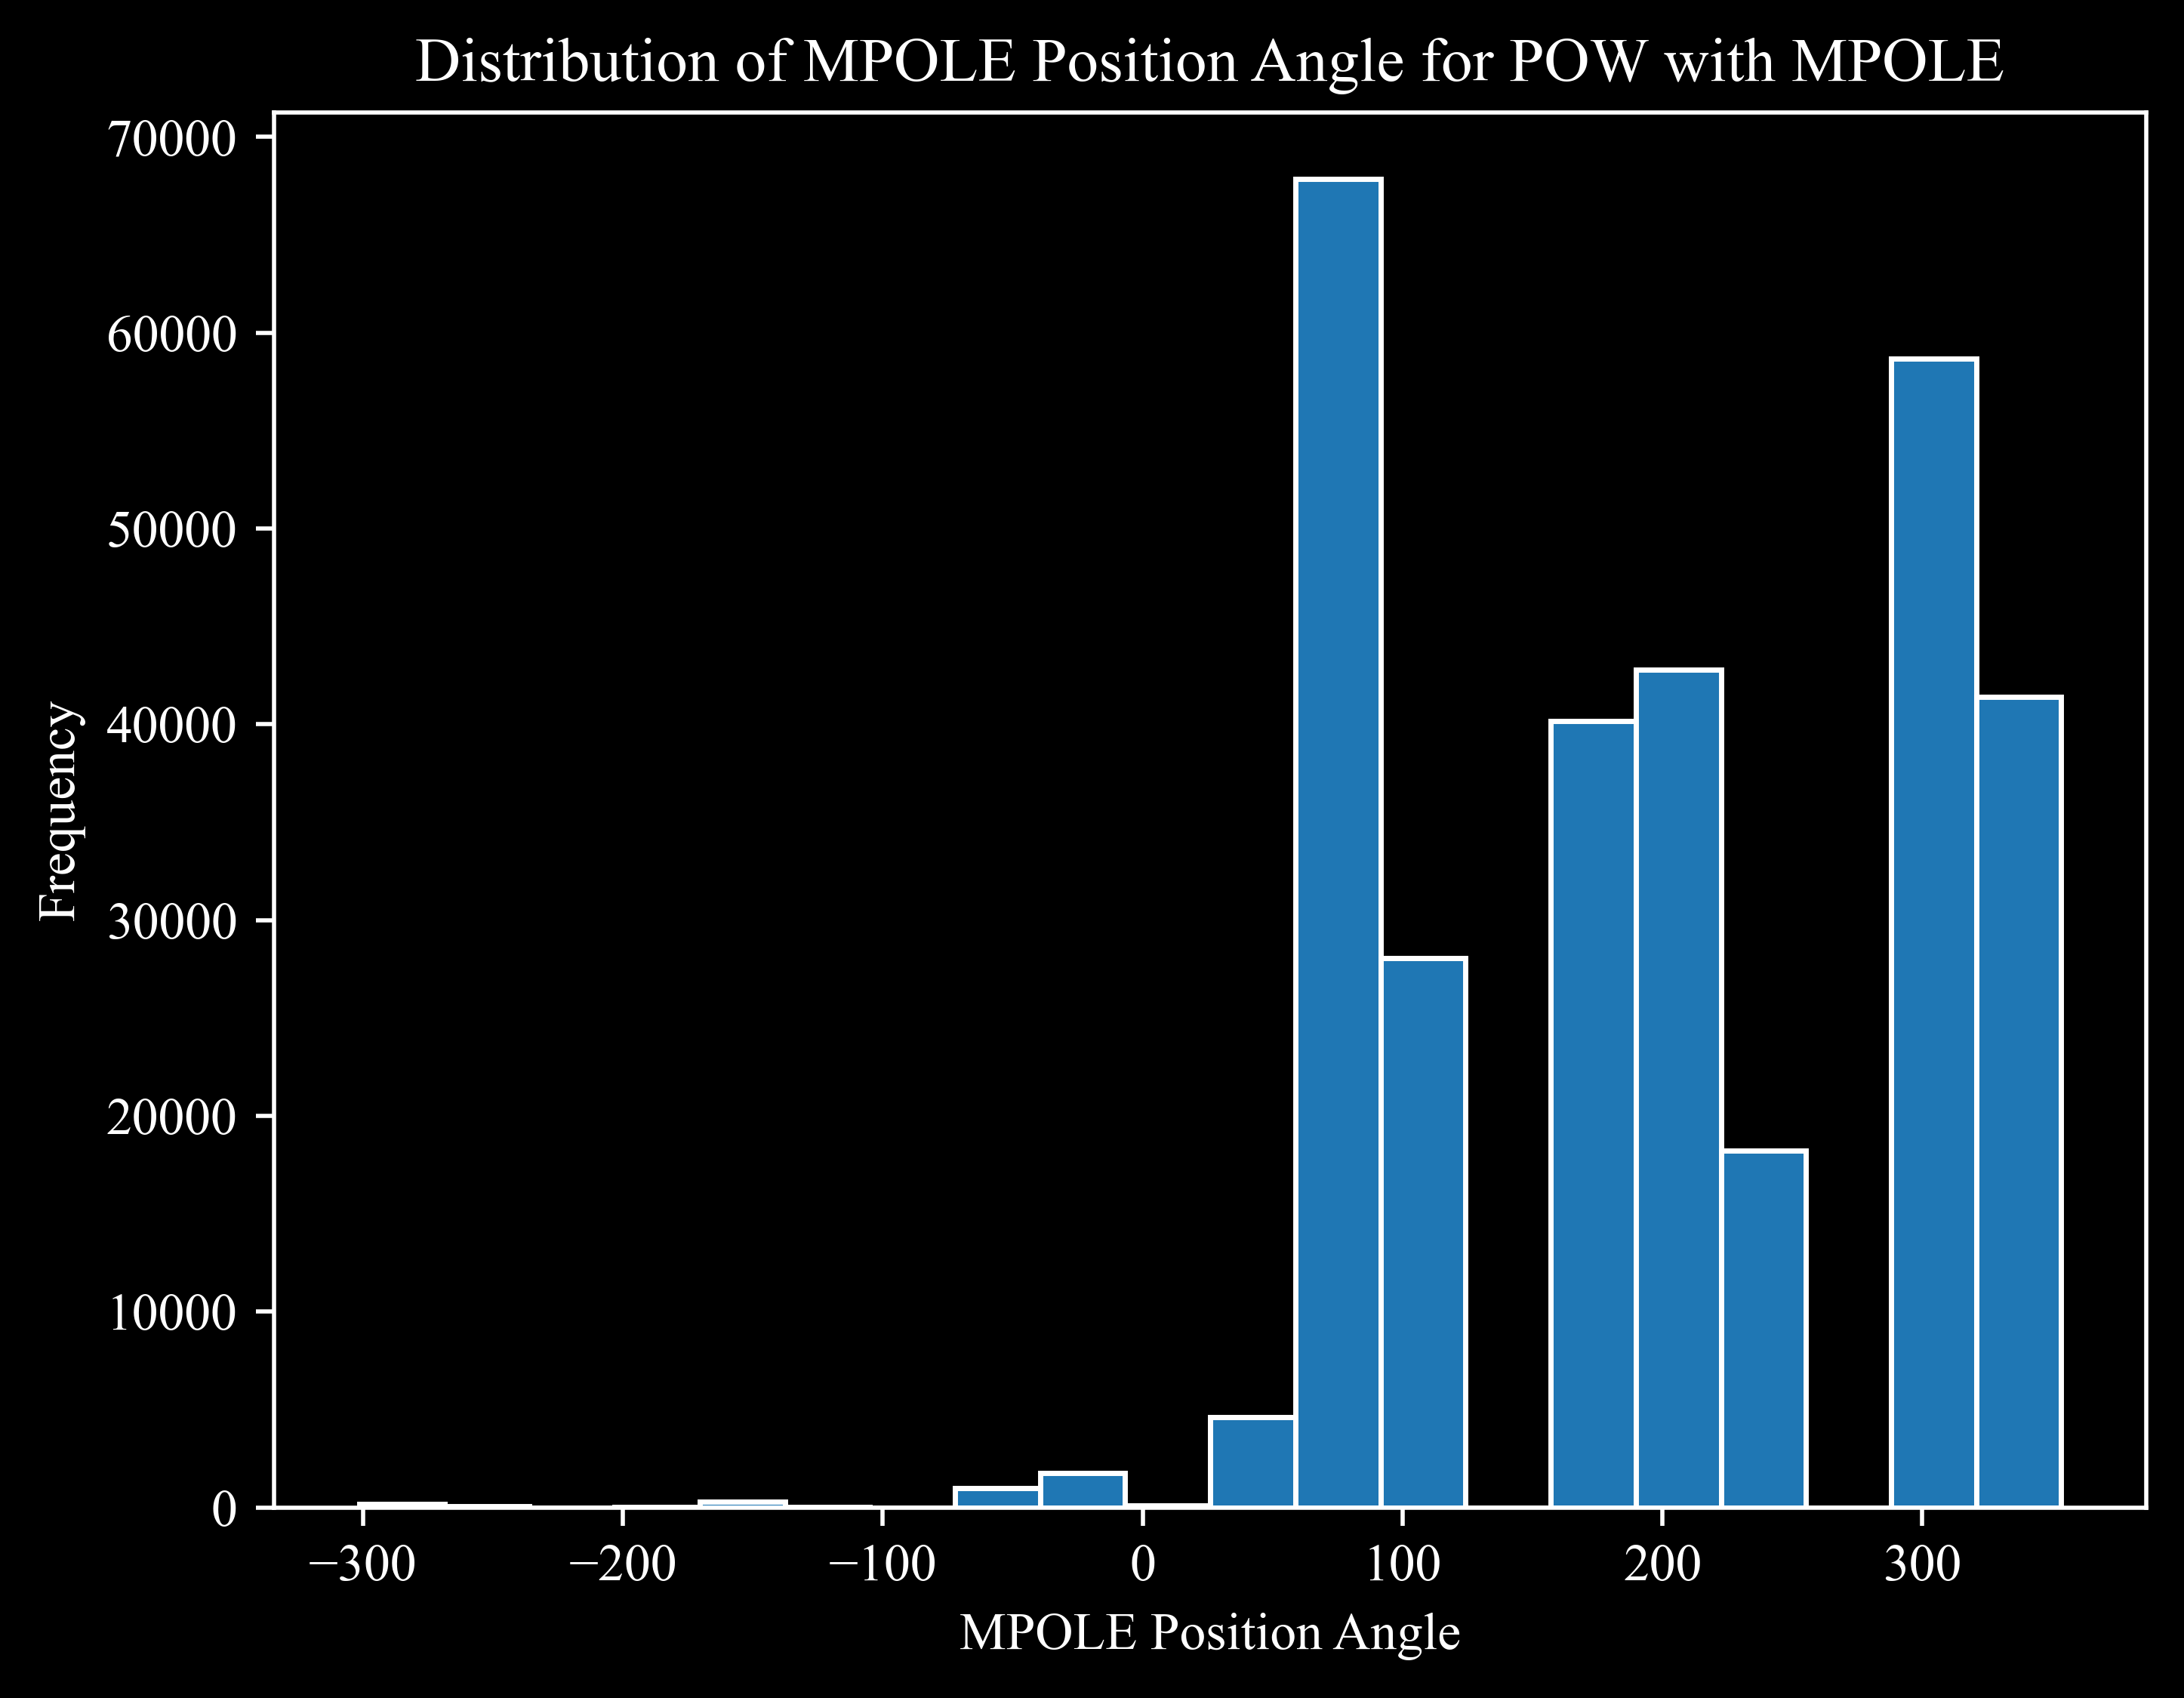

In [10]:
plt.hist(filtered_df['t_mpole_pa'], bins=20, edgecolor='w')
plt.xlabel('MPOLE Position Angle', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of MPOLE Position Angle for POW with MPOLE')
plt.show()

In [11]:
aligned_pa = (filtered_df['t_mpole_pa'] > 100) & (filtered_df['t_mpole_pa'] < 200)
num_aligned = len(filtered_df[aligned_pa])
print(f"Number of aligned MPOLE position angles: {num_aligned}")
anti_aligned_pa = (filtered_df['t_mpole_pa'] < 0) | (filtered_df['t_mpole_pa'] > 200)
print(f"Number of anti-aligned MPOLE position angles: {len(filtered_df[anti_aligned_pa])}")

# Percentage
percentage_aligned = (num_aligned / len(filtered_df)) * 100
print(f"Percentage of aligned MPOLE position angles: {percentage_aligned:.2f}%")
percentage_anti_aligned = (len(filtered_df[anti_aligned_pa]) / len(filtered_df)) * 100
print(f"Percentage of anti-aligned MPOLE position angles: {percentage_anti_aligned:.2f}%")

Number of aligned MPOLE position angles: 78264
Number of anti-aligned MPOLE position angles: 146697
Percentage of aligned MPOLE position angles: 25.64%
Percentage of anti-aligned MPOLE position angles: 48.06%


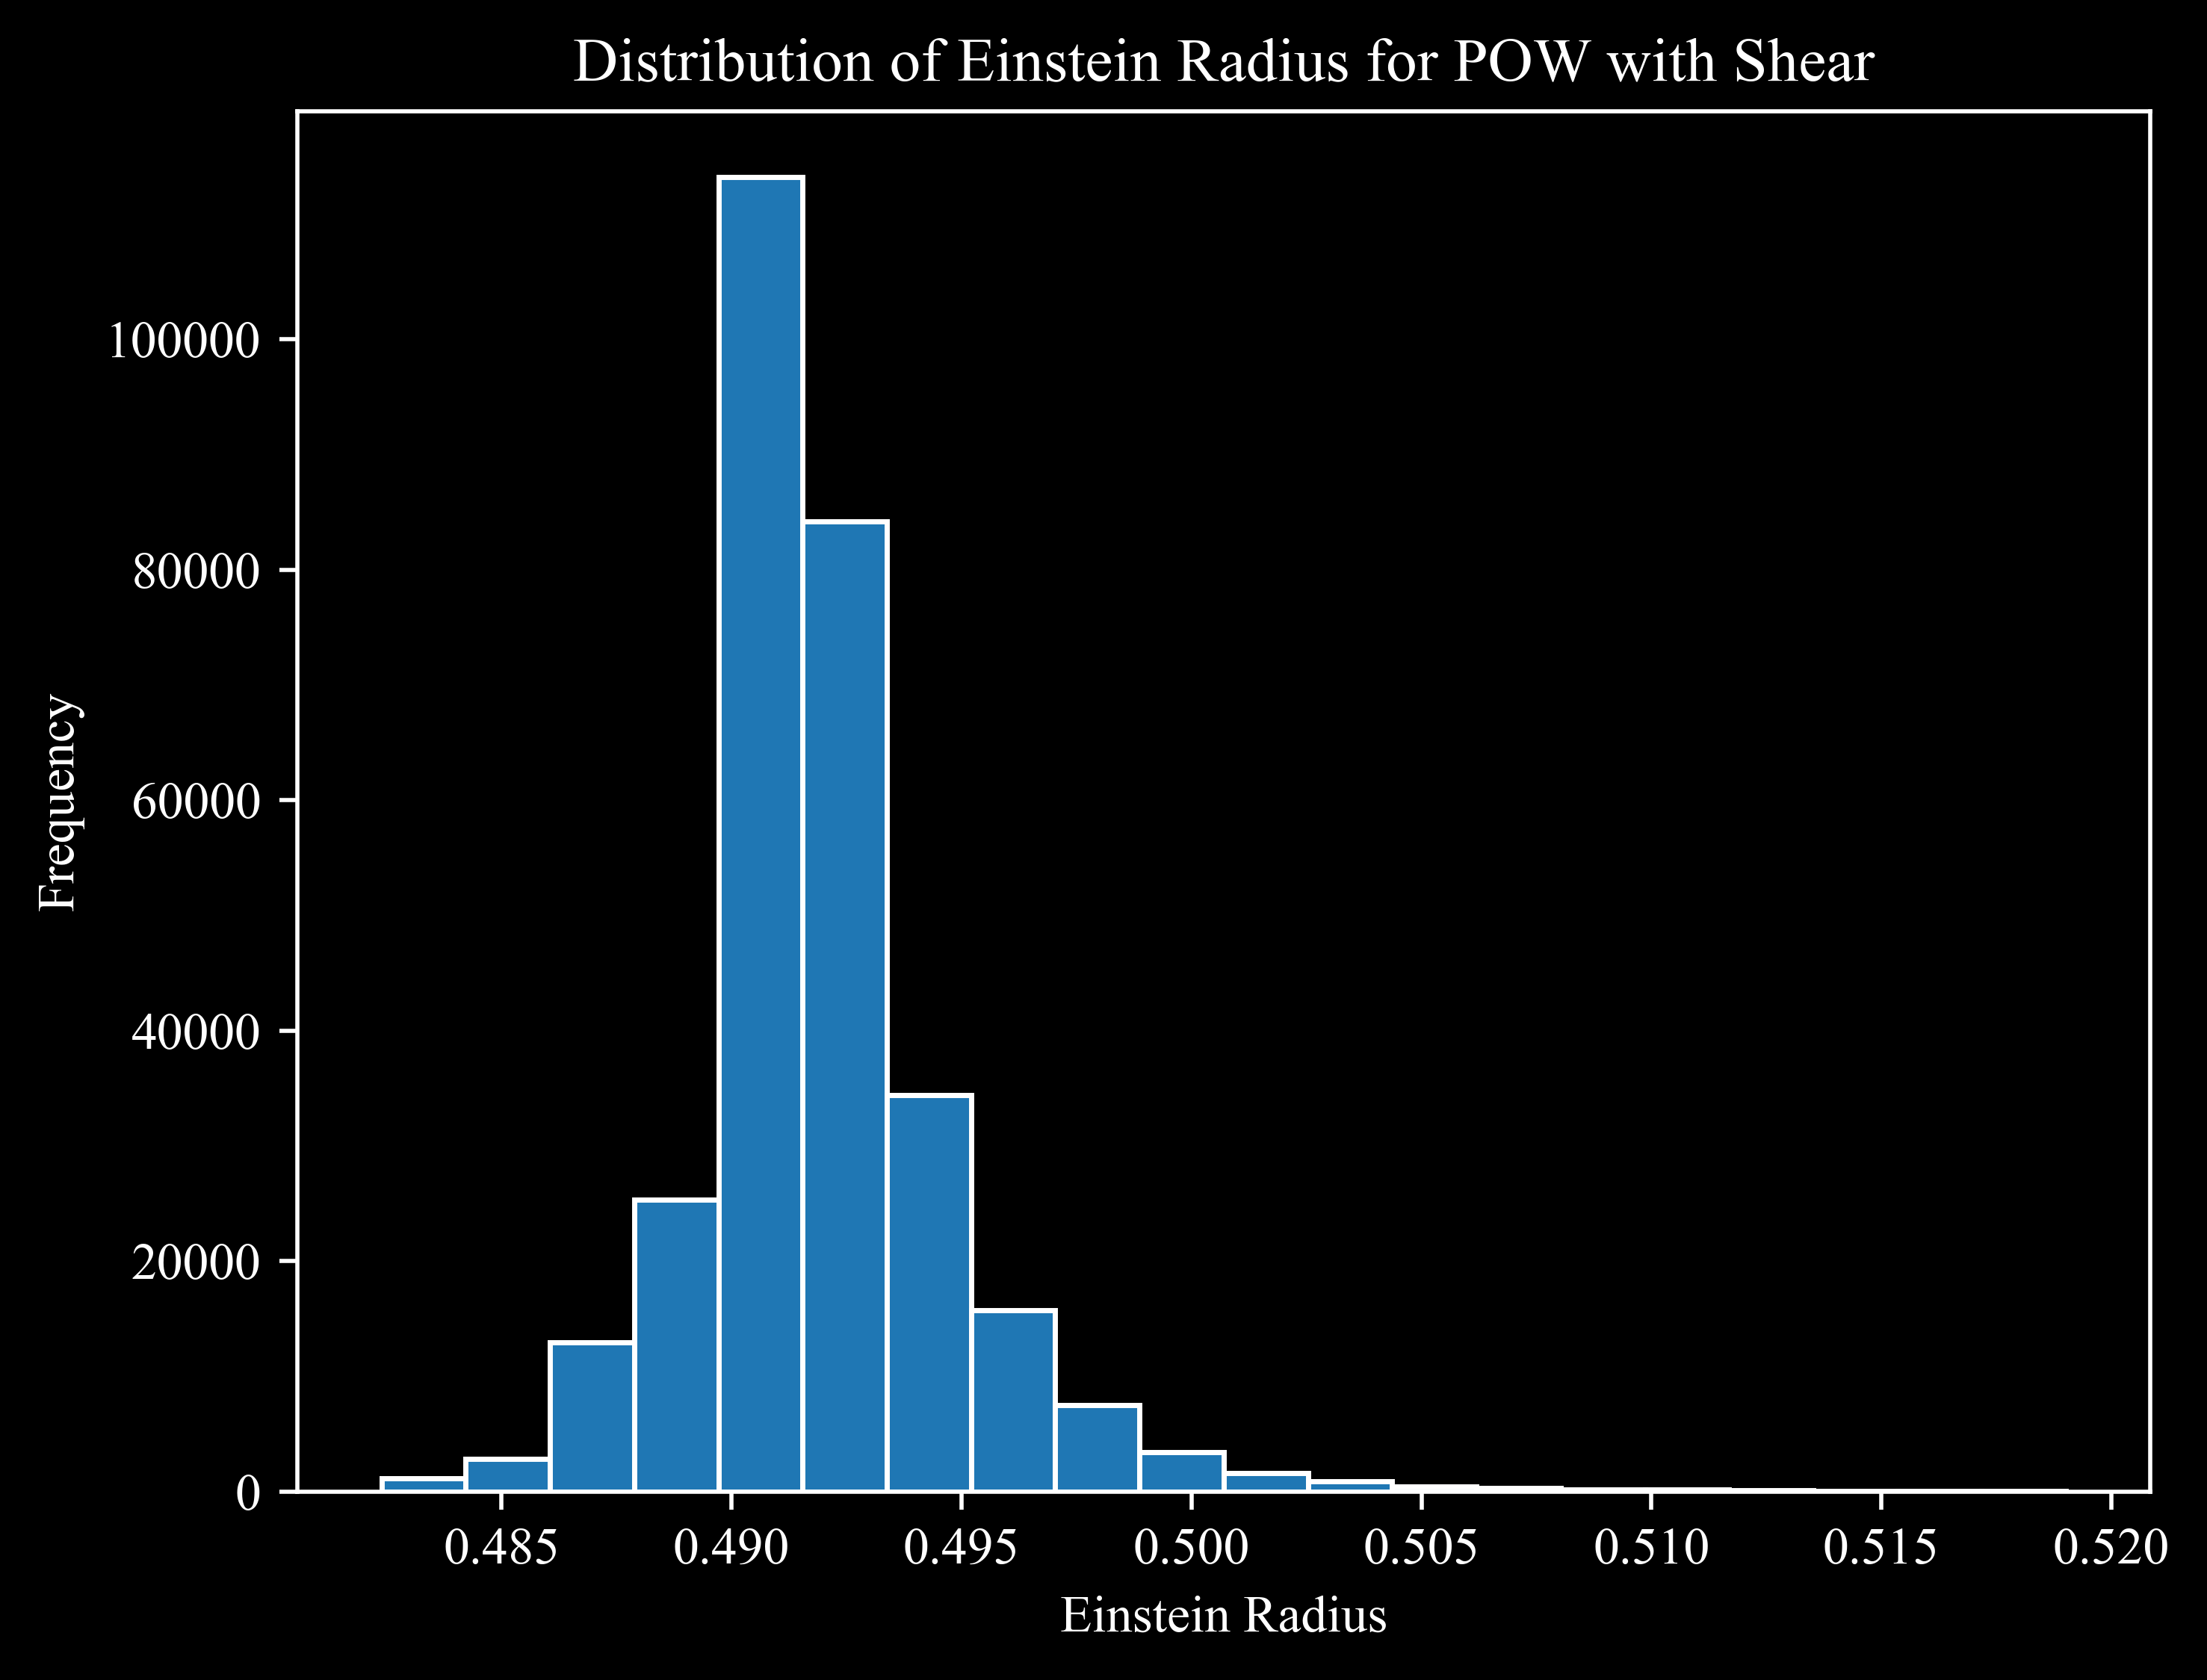

In [12]:
plt.hist(filtered_df['r_ein'], bins=20, edgecolor='w')
plt.xlabel('Einstein Radius', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of Einstein Radius for POW with Shear')
plt.show()

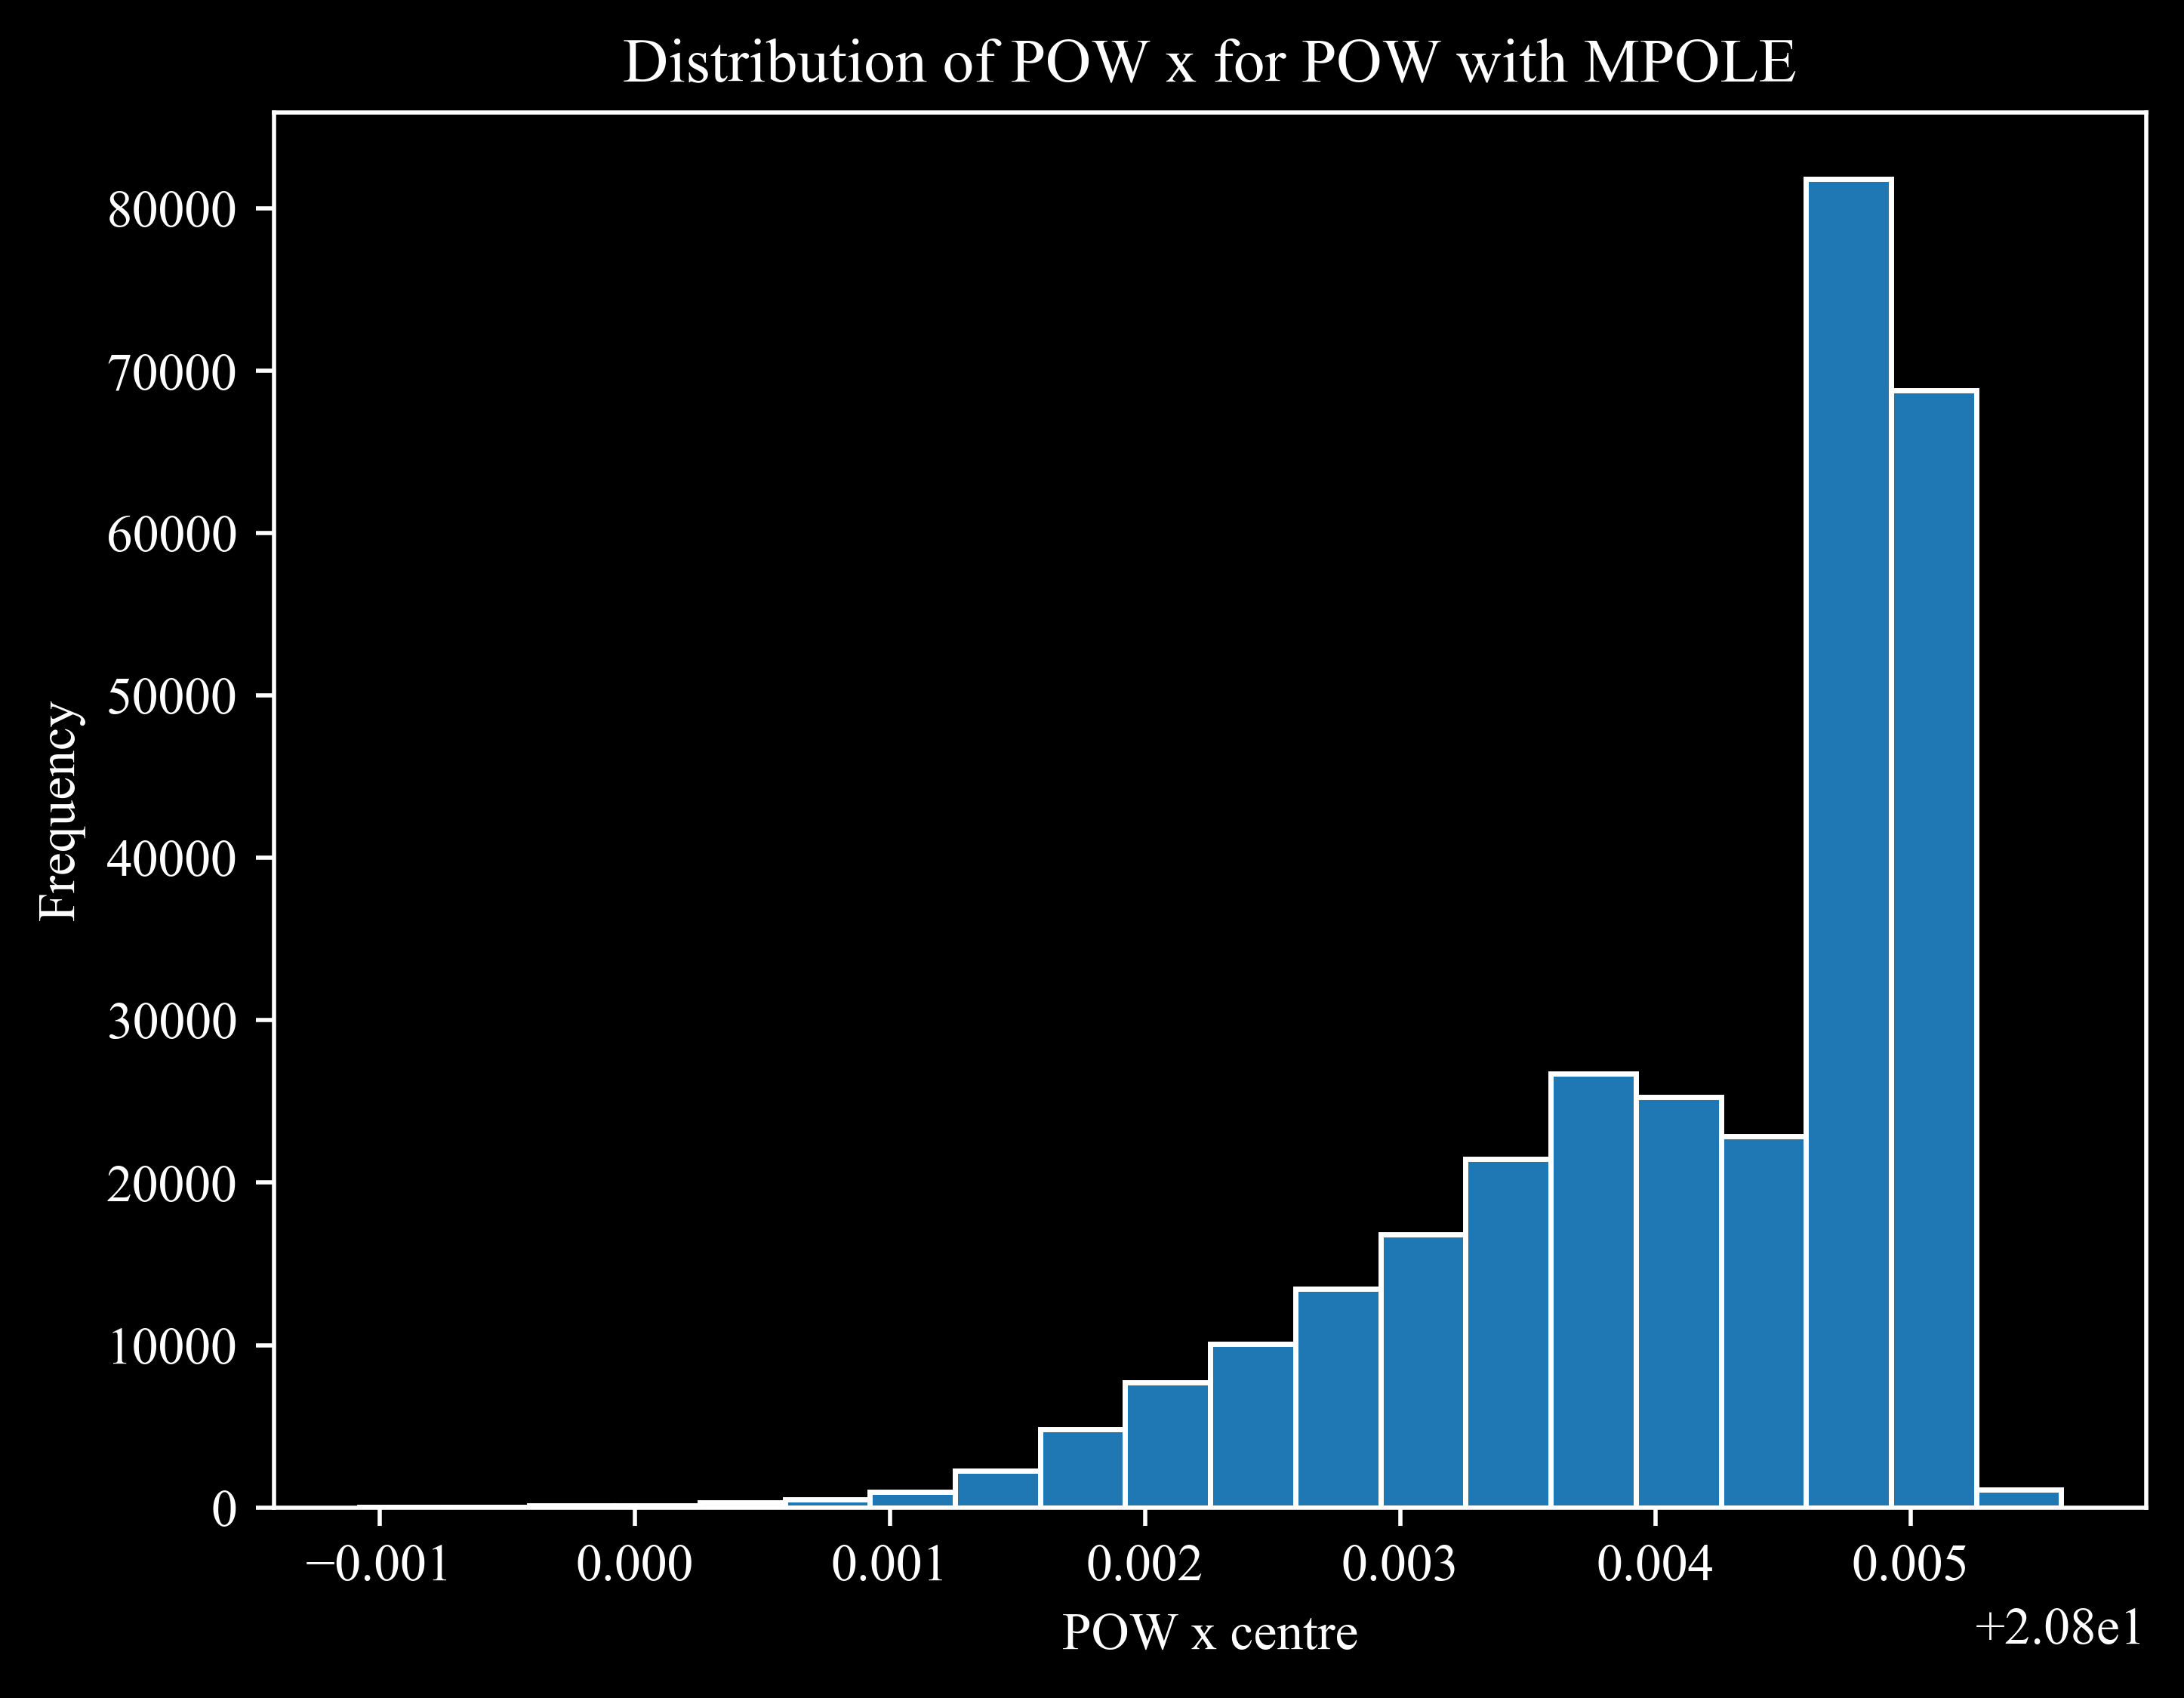

In [13]:
plt.hist(filtered_df['x'], bins=20, edgecolor='w')
plt.xlabel('POW x centre', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW x for POW with MPOLE')
plt.show()

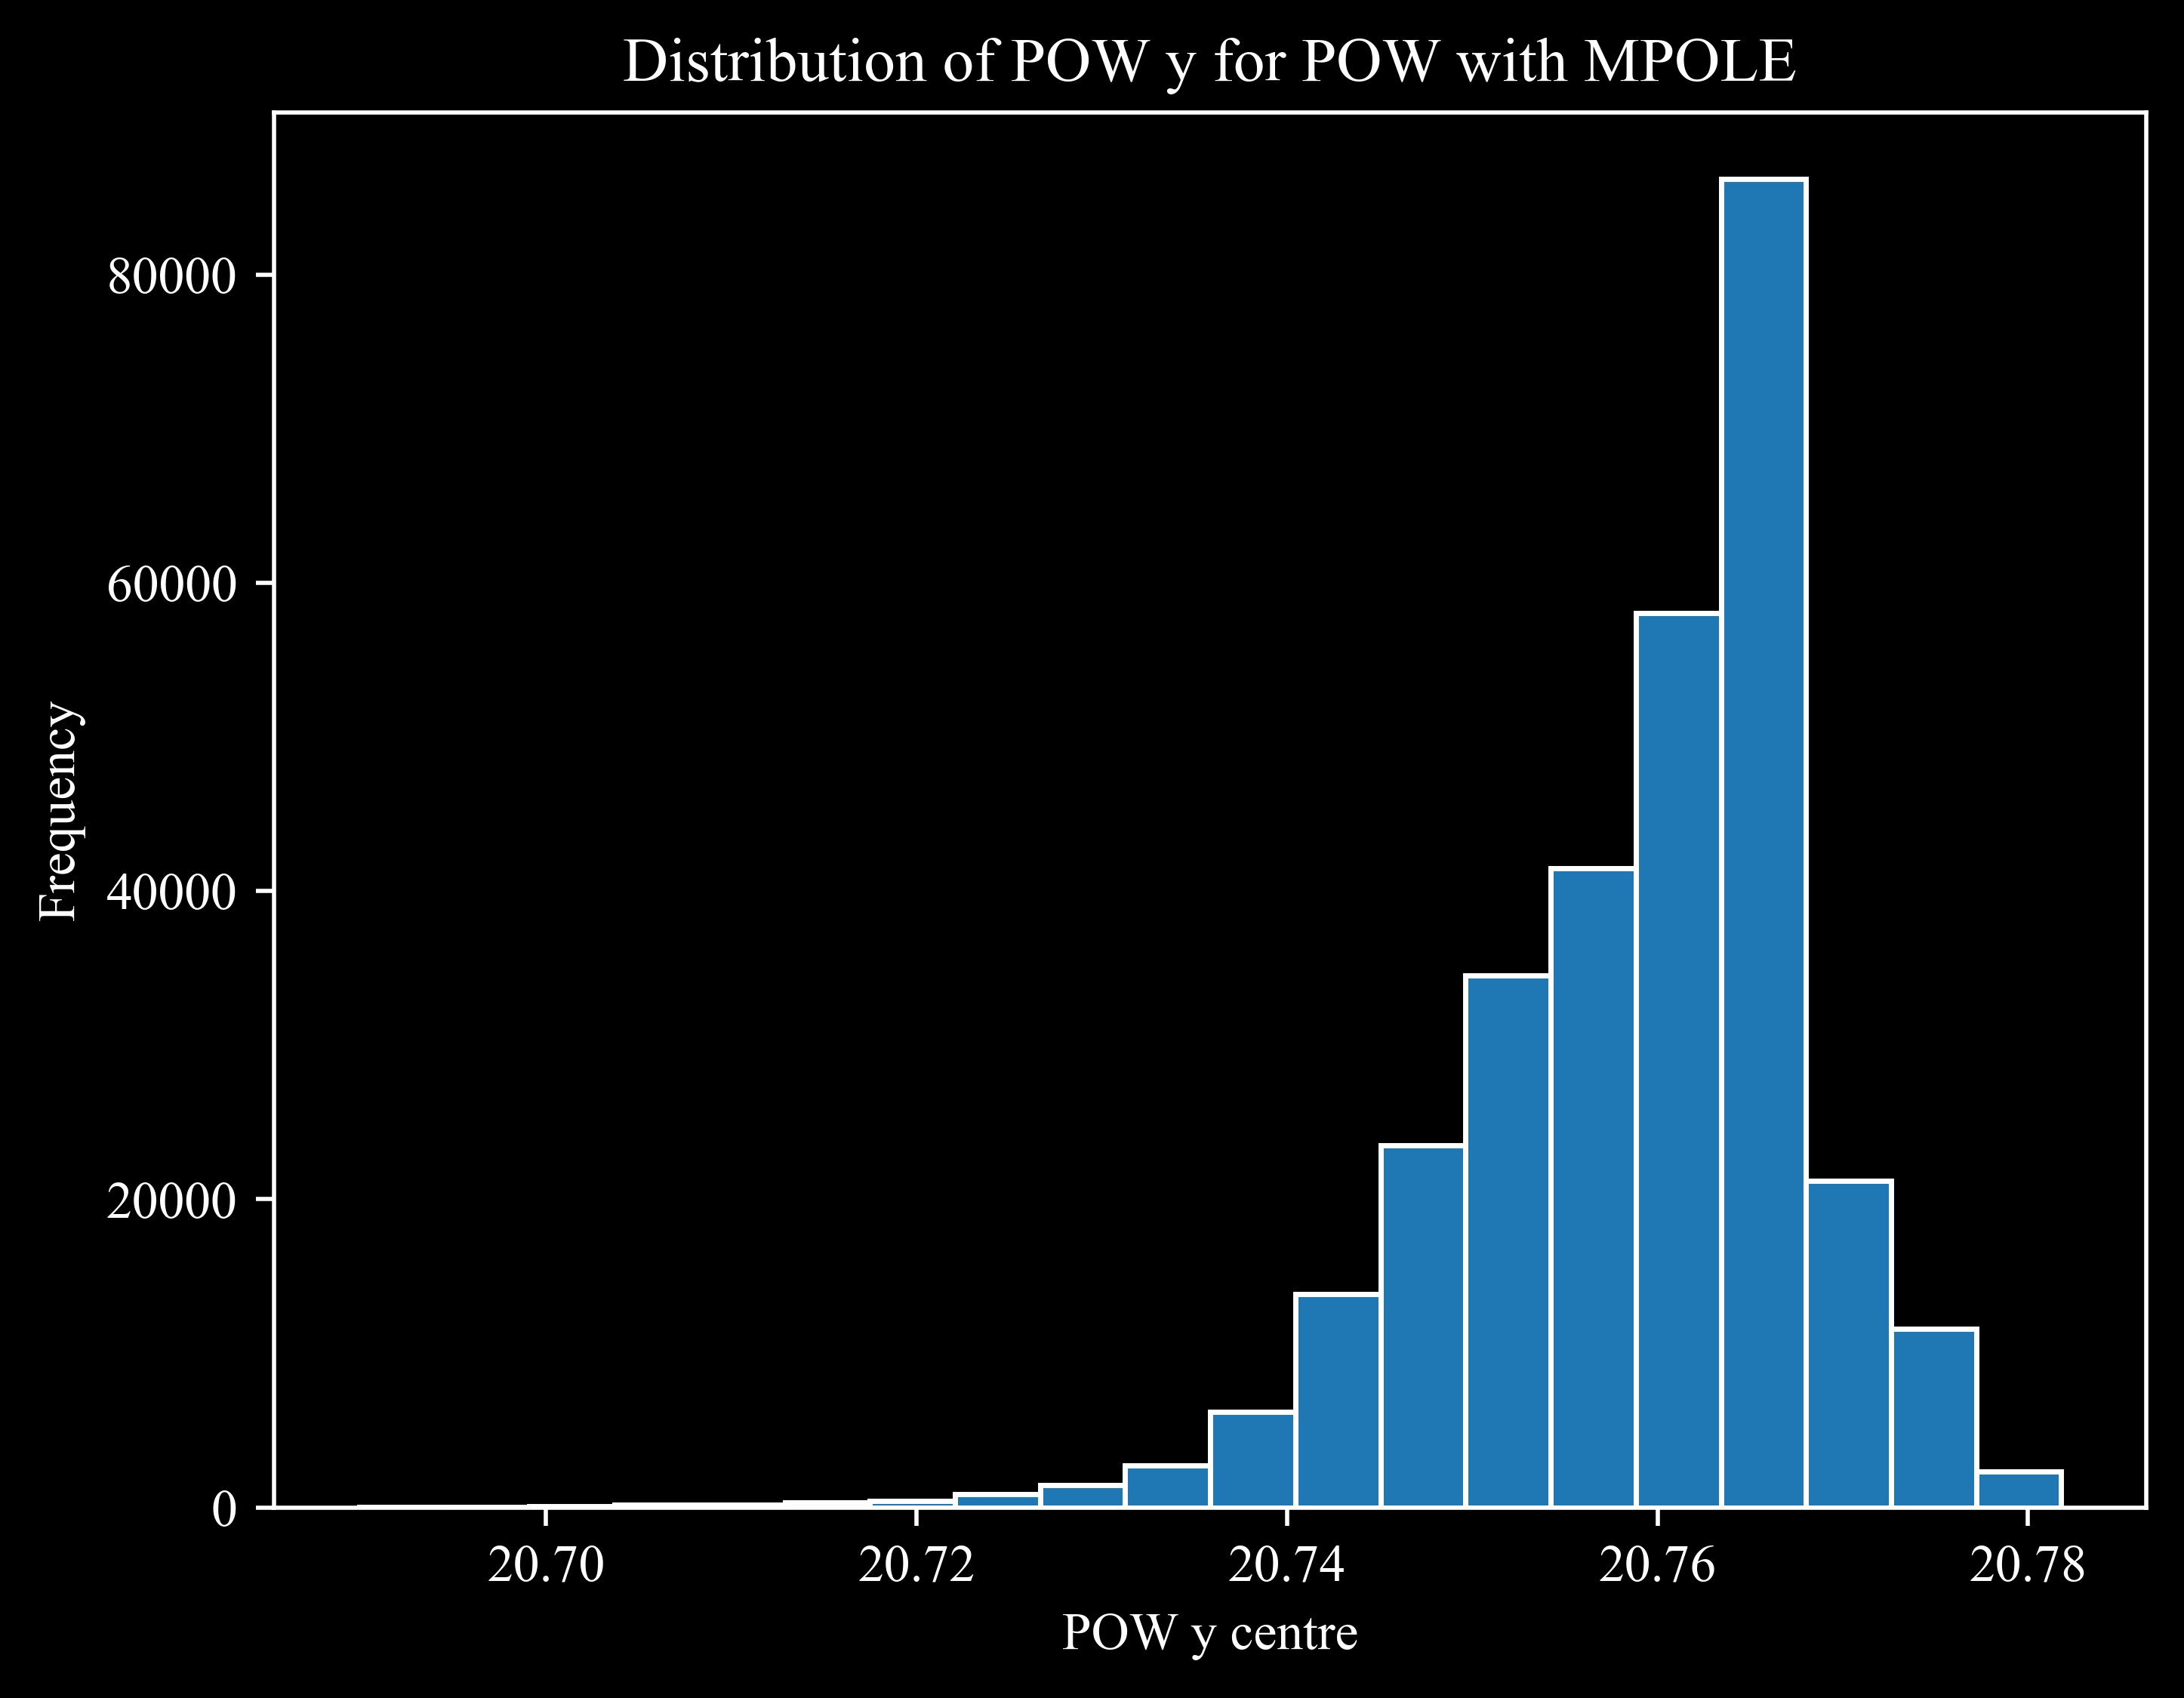

In [14]:
plt.hist(filtered_df['y'], bins=20, edgecolor='w')
plt.xlabel('POW y centre', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW y for POW with MPOLE')
plt.show()

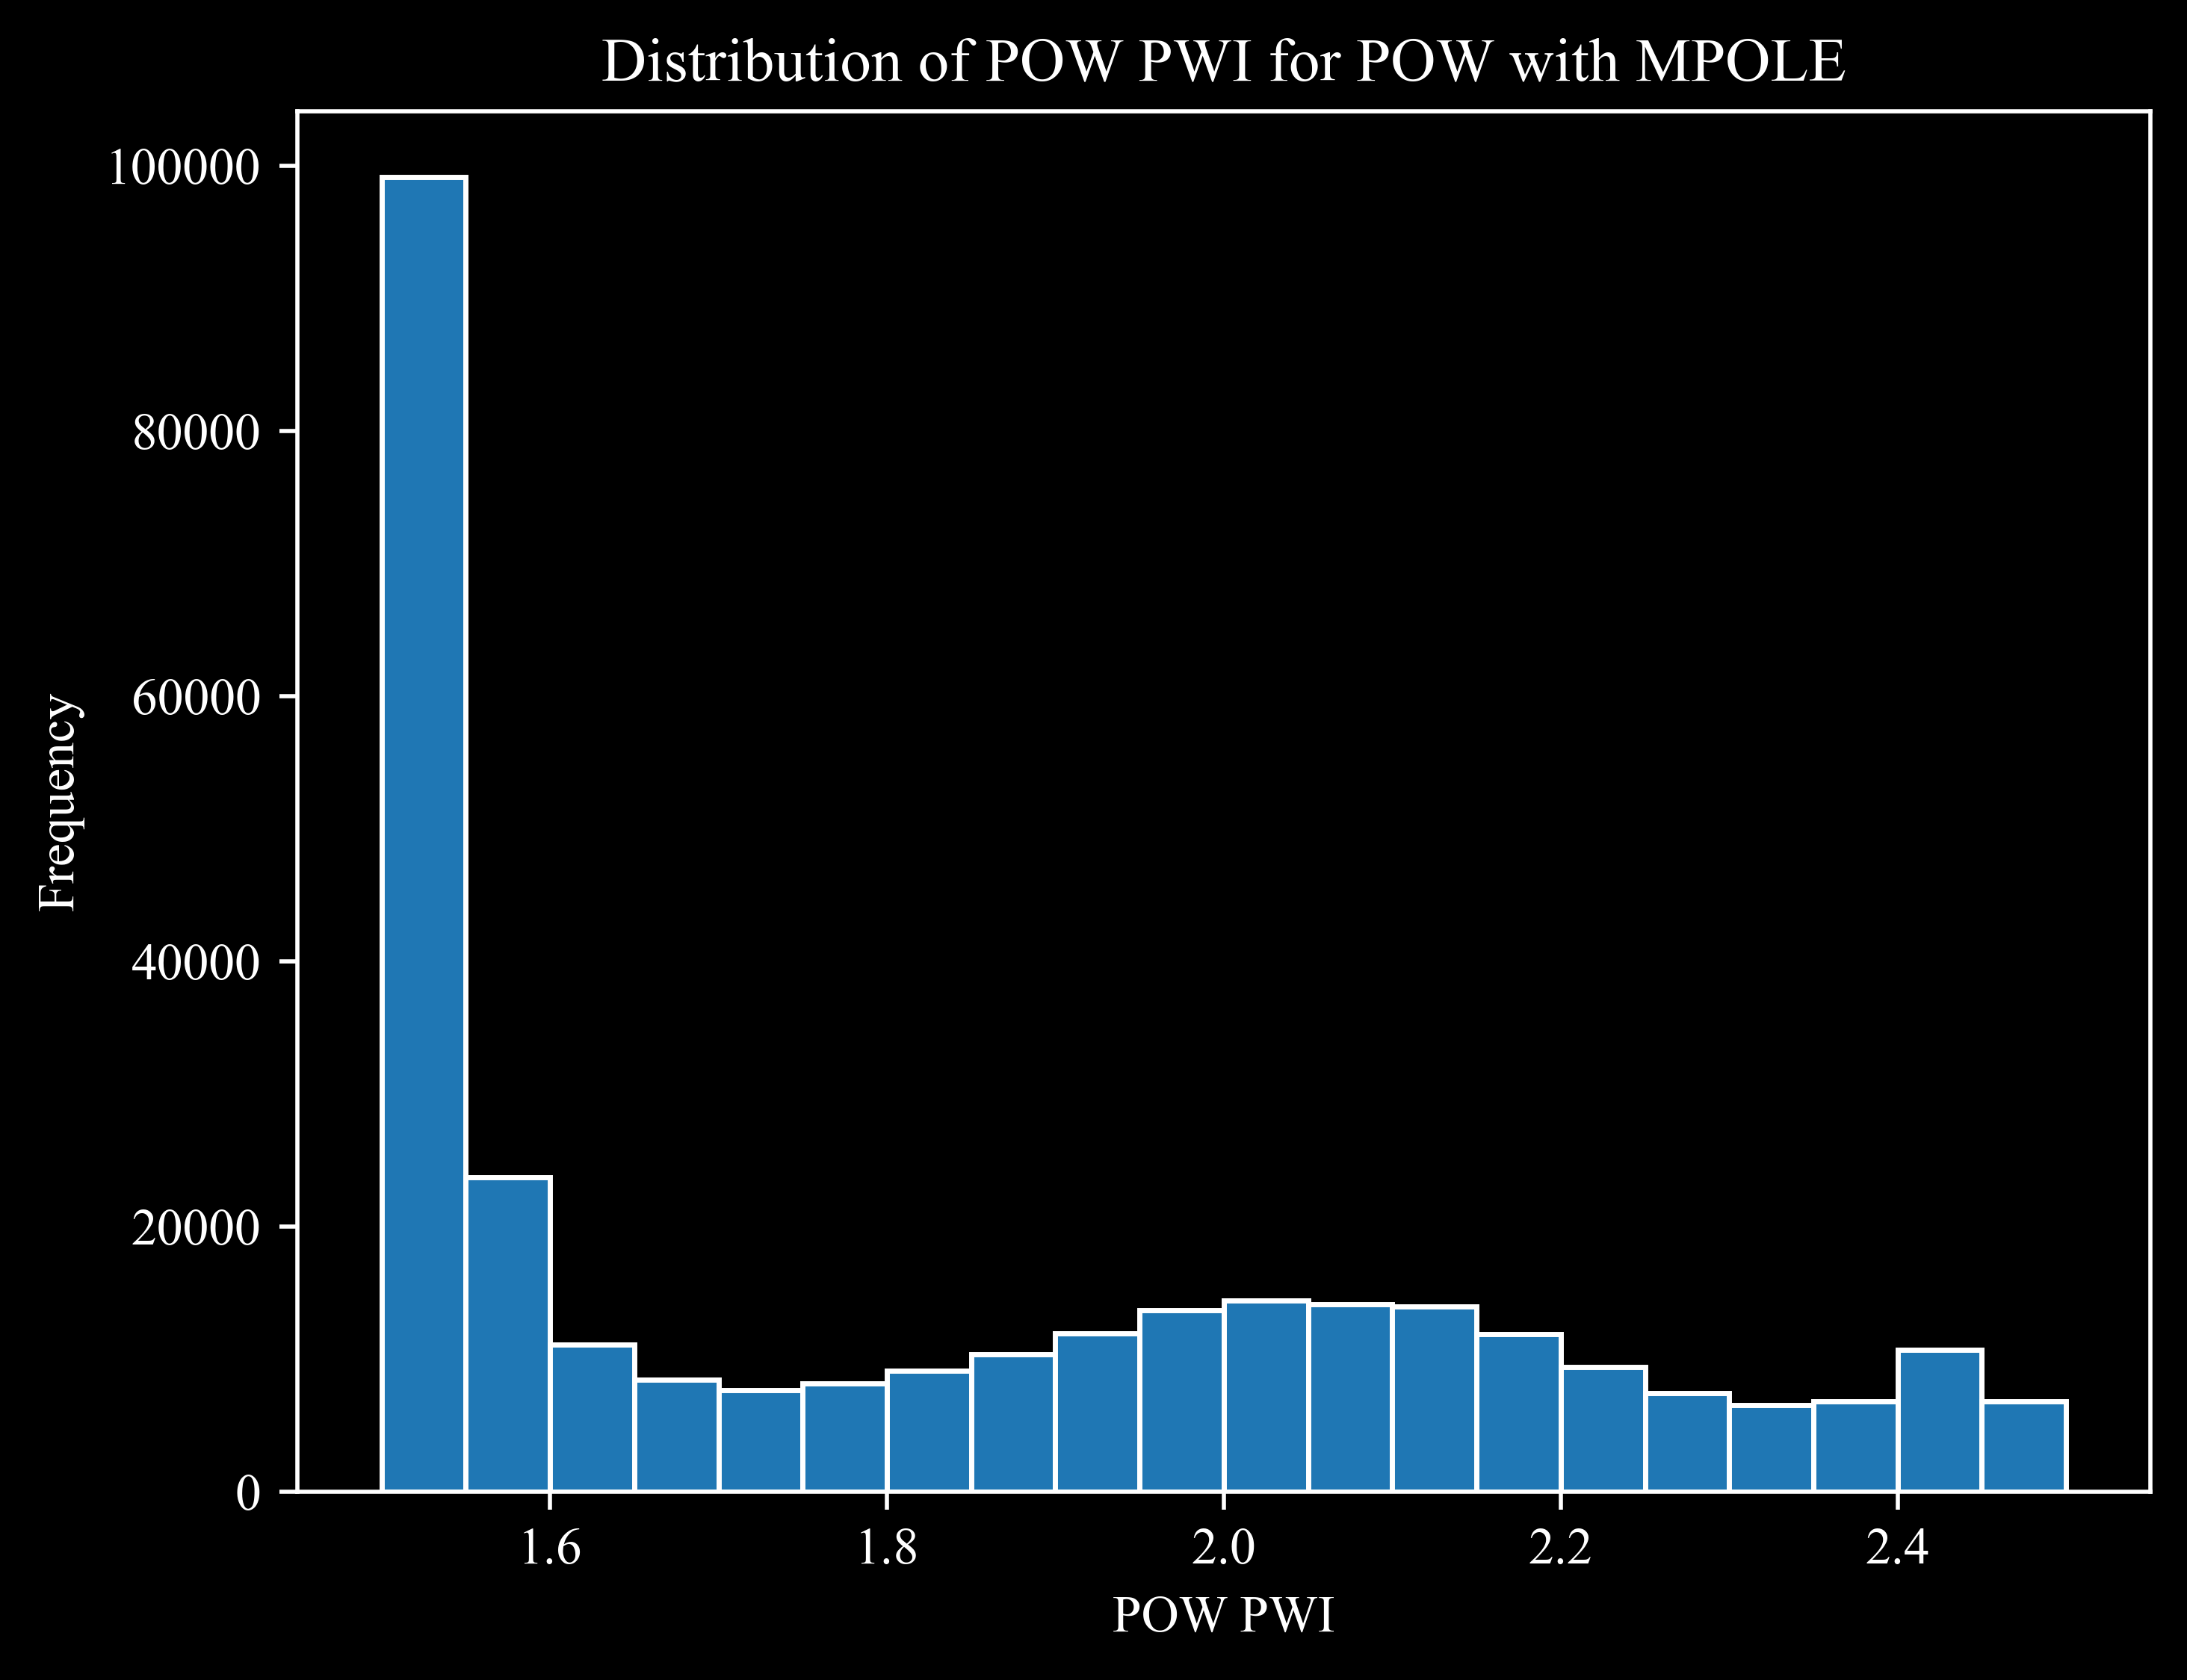

In [15]:
plt.hist(filtered_df['pwi'], bins=20, edgecolor='w')
plt.xlabel('POW PWI', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW PWI for POW with MPOLE')
plt.show()

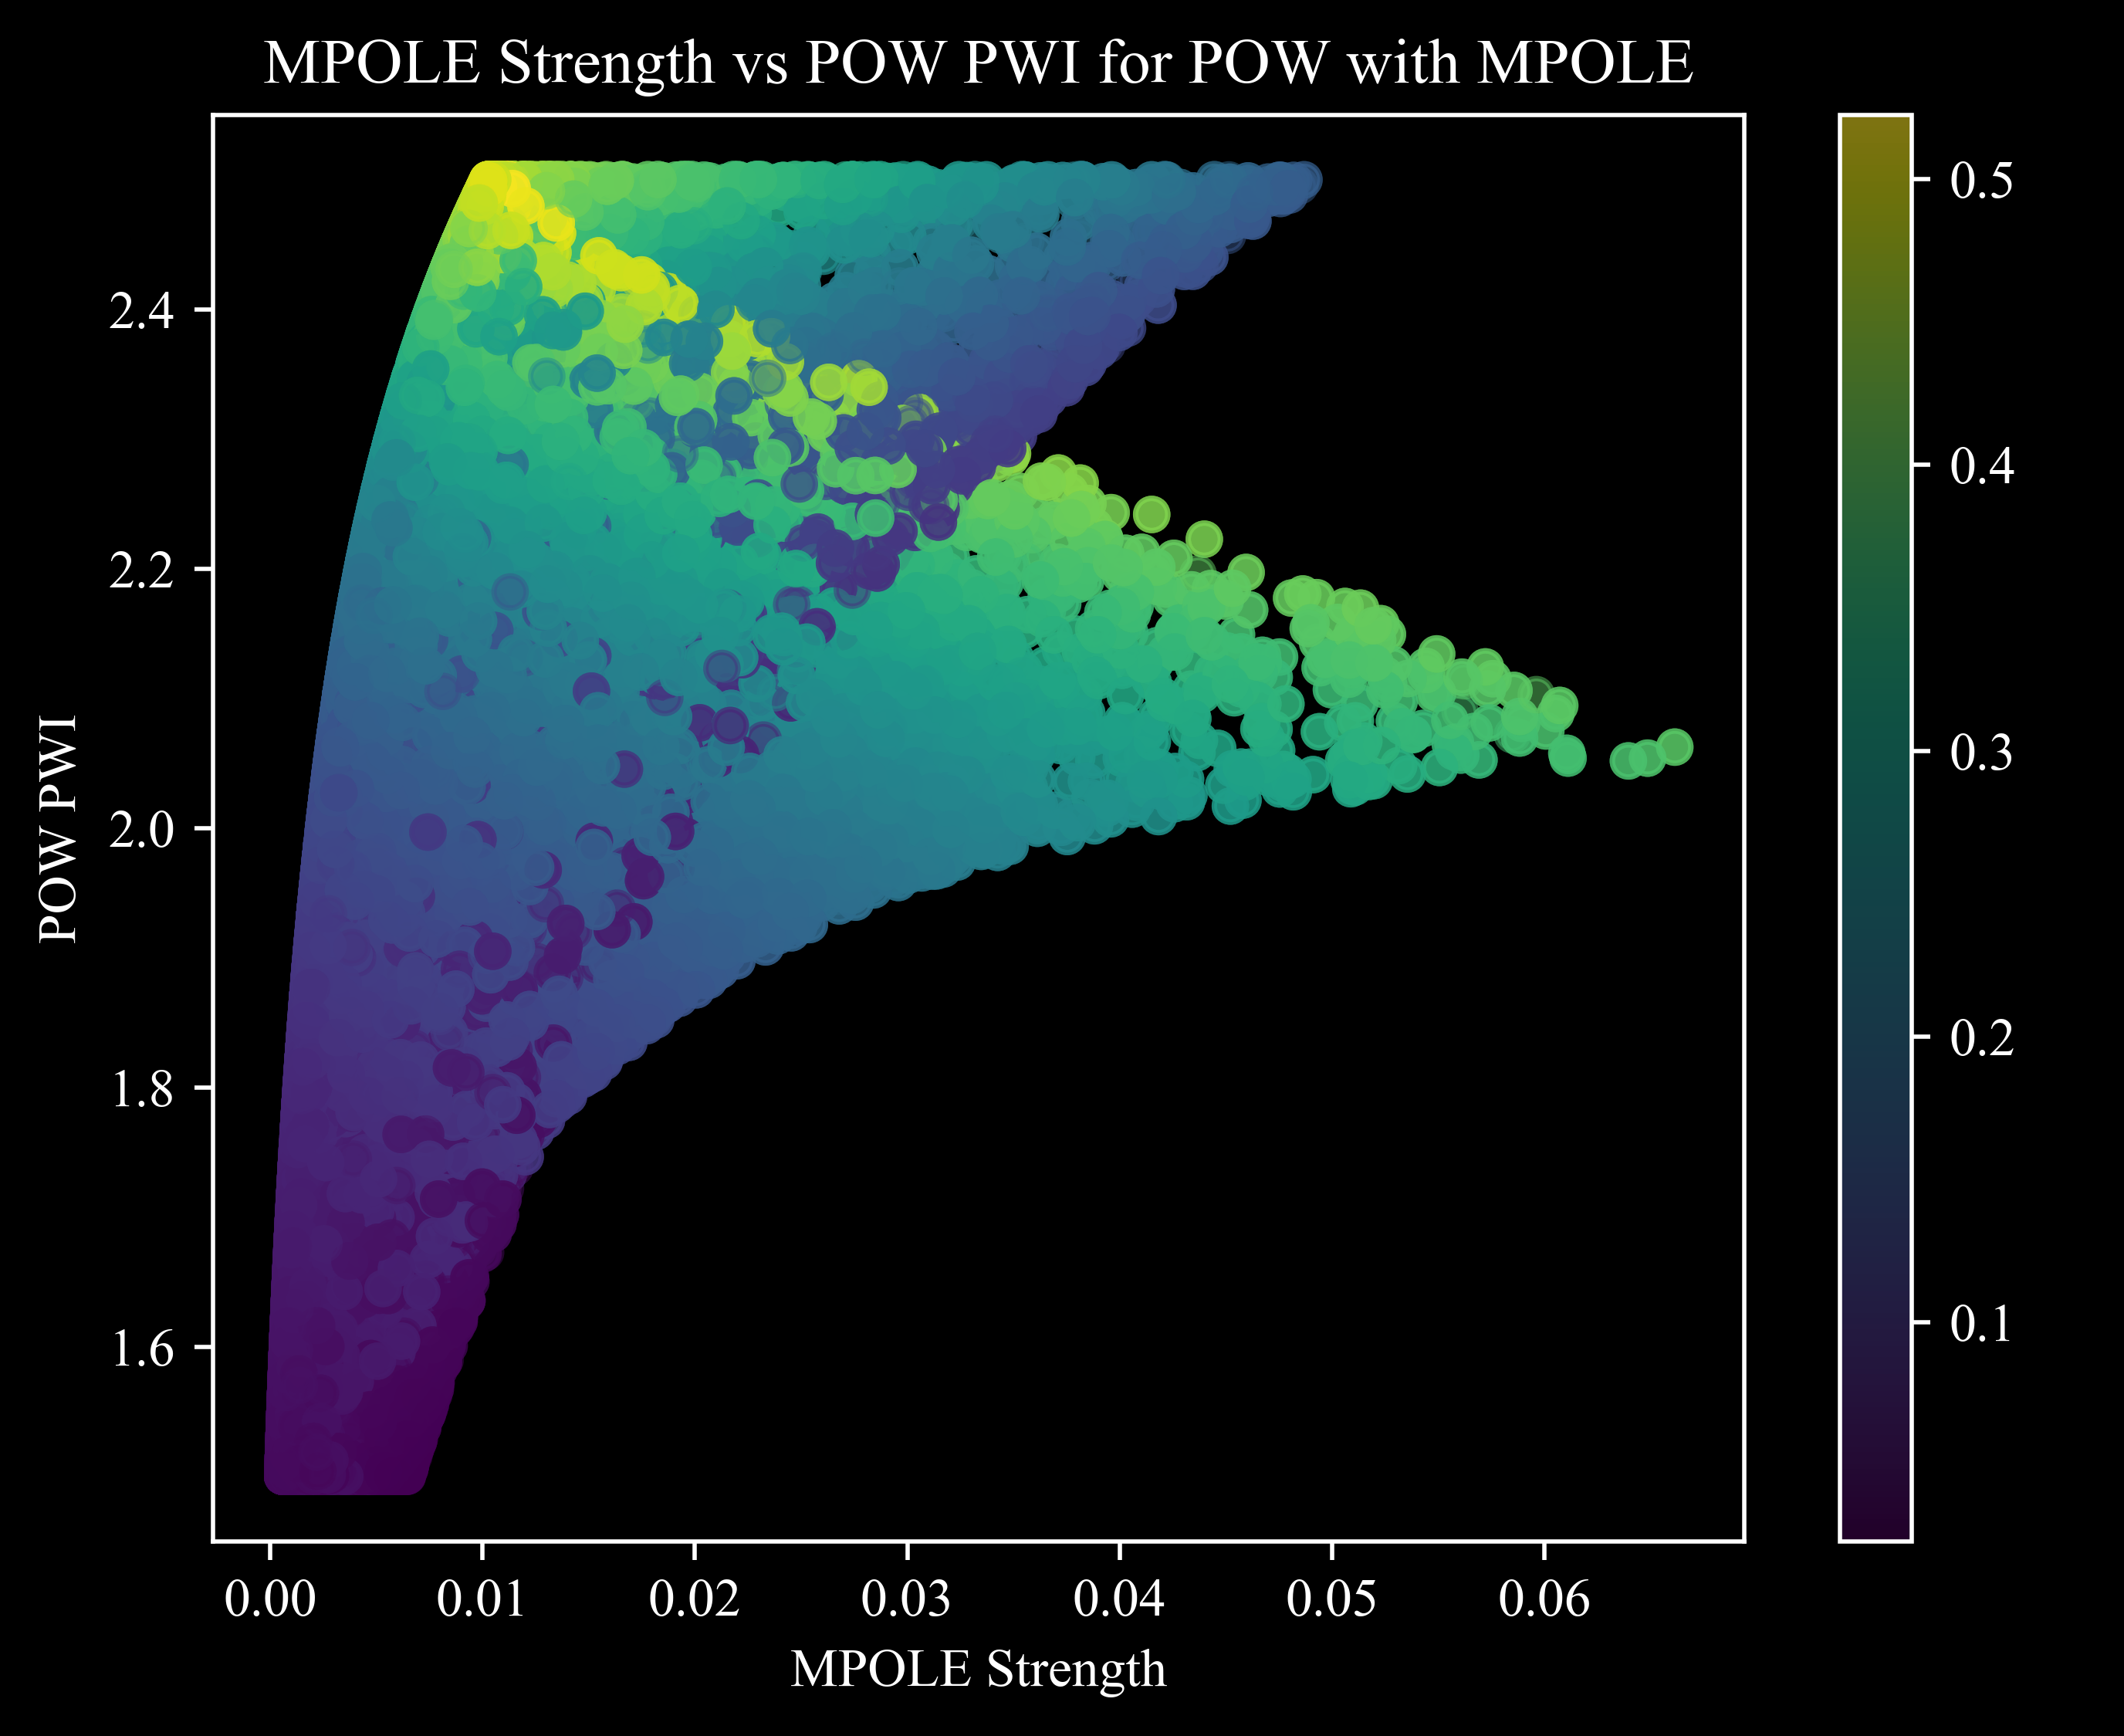

In [16]:
plt.scatter(filtered_df['t_mpole_str'], filtered_df['pwi'], c=filtered_df['e'], alpha=0.5)
plt.colorbar(label='Ellipticity')
plt.xlabel('MPOLE Strength', color = 'w')
plt.ylabel('POW PWI', color = 'w')
plt.title('MPOLE Strength vs POW PWI for POW with MPOLE')
plt.show()

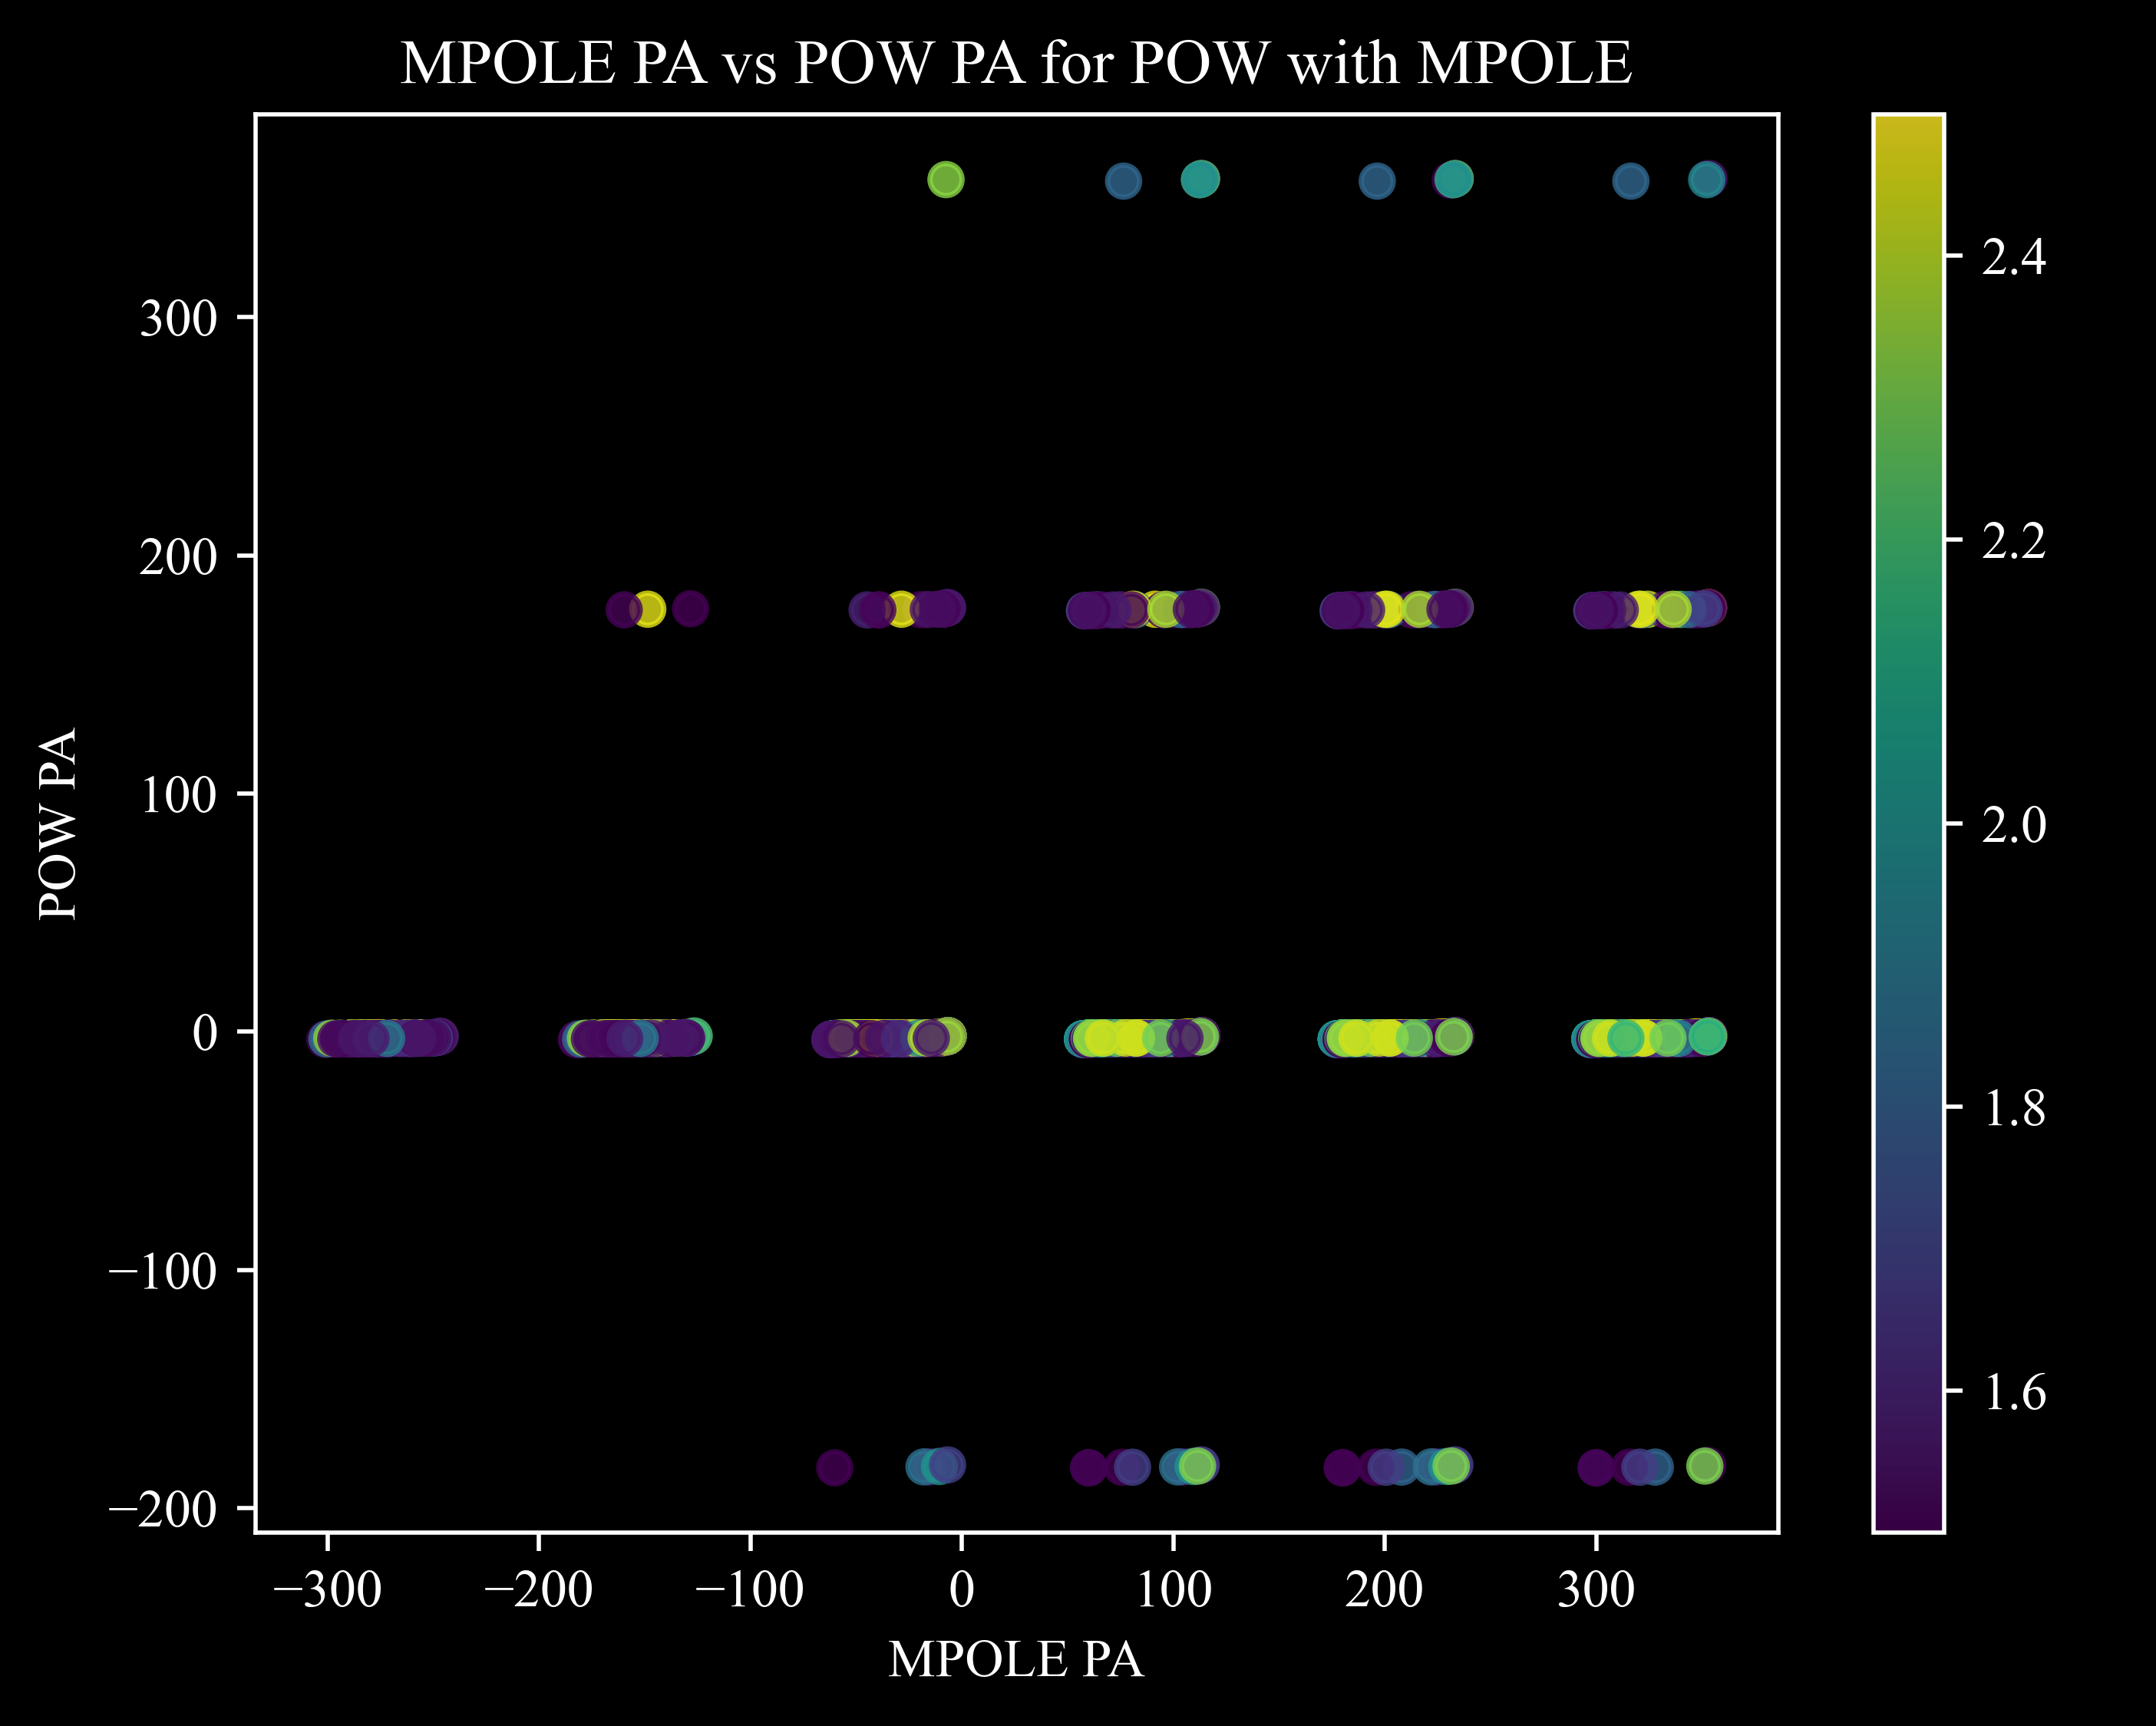

In [17]:
plt.scatter(filtered_df['t_mpole_pa'], filtered_df['pow_pa'], c=filtered_df['pwi'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('MPOLE PA', color = 'w')
plt.ylabel('POW PA', color = 'w')
plt.title('MPOLE PA vs POW PA for POW with MPOLE')
plt.show()

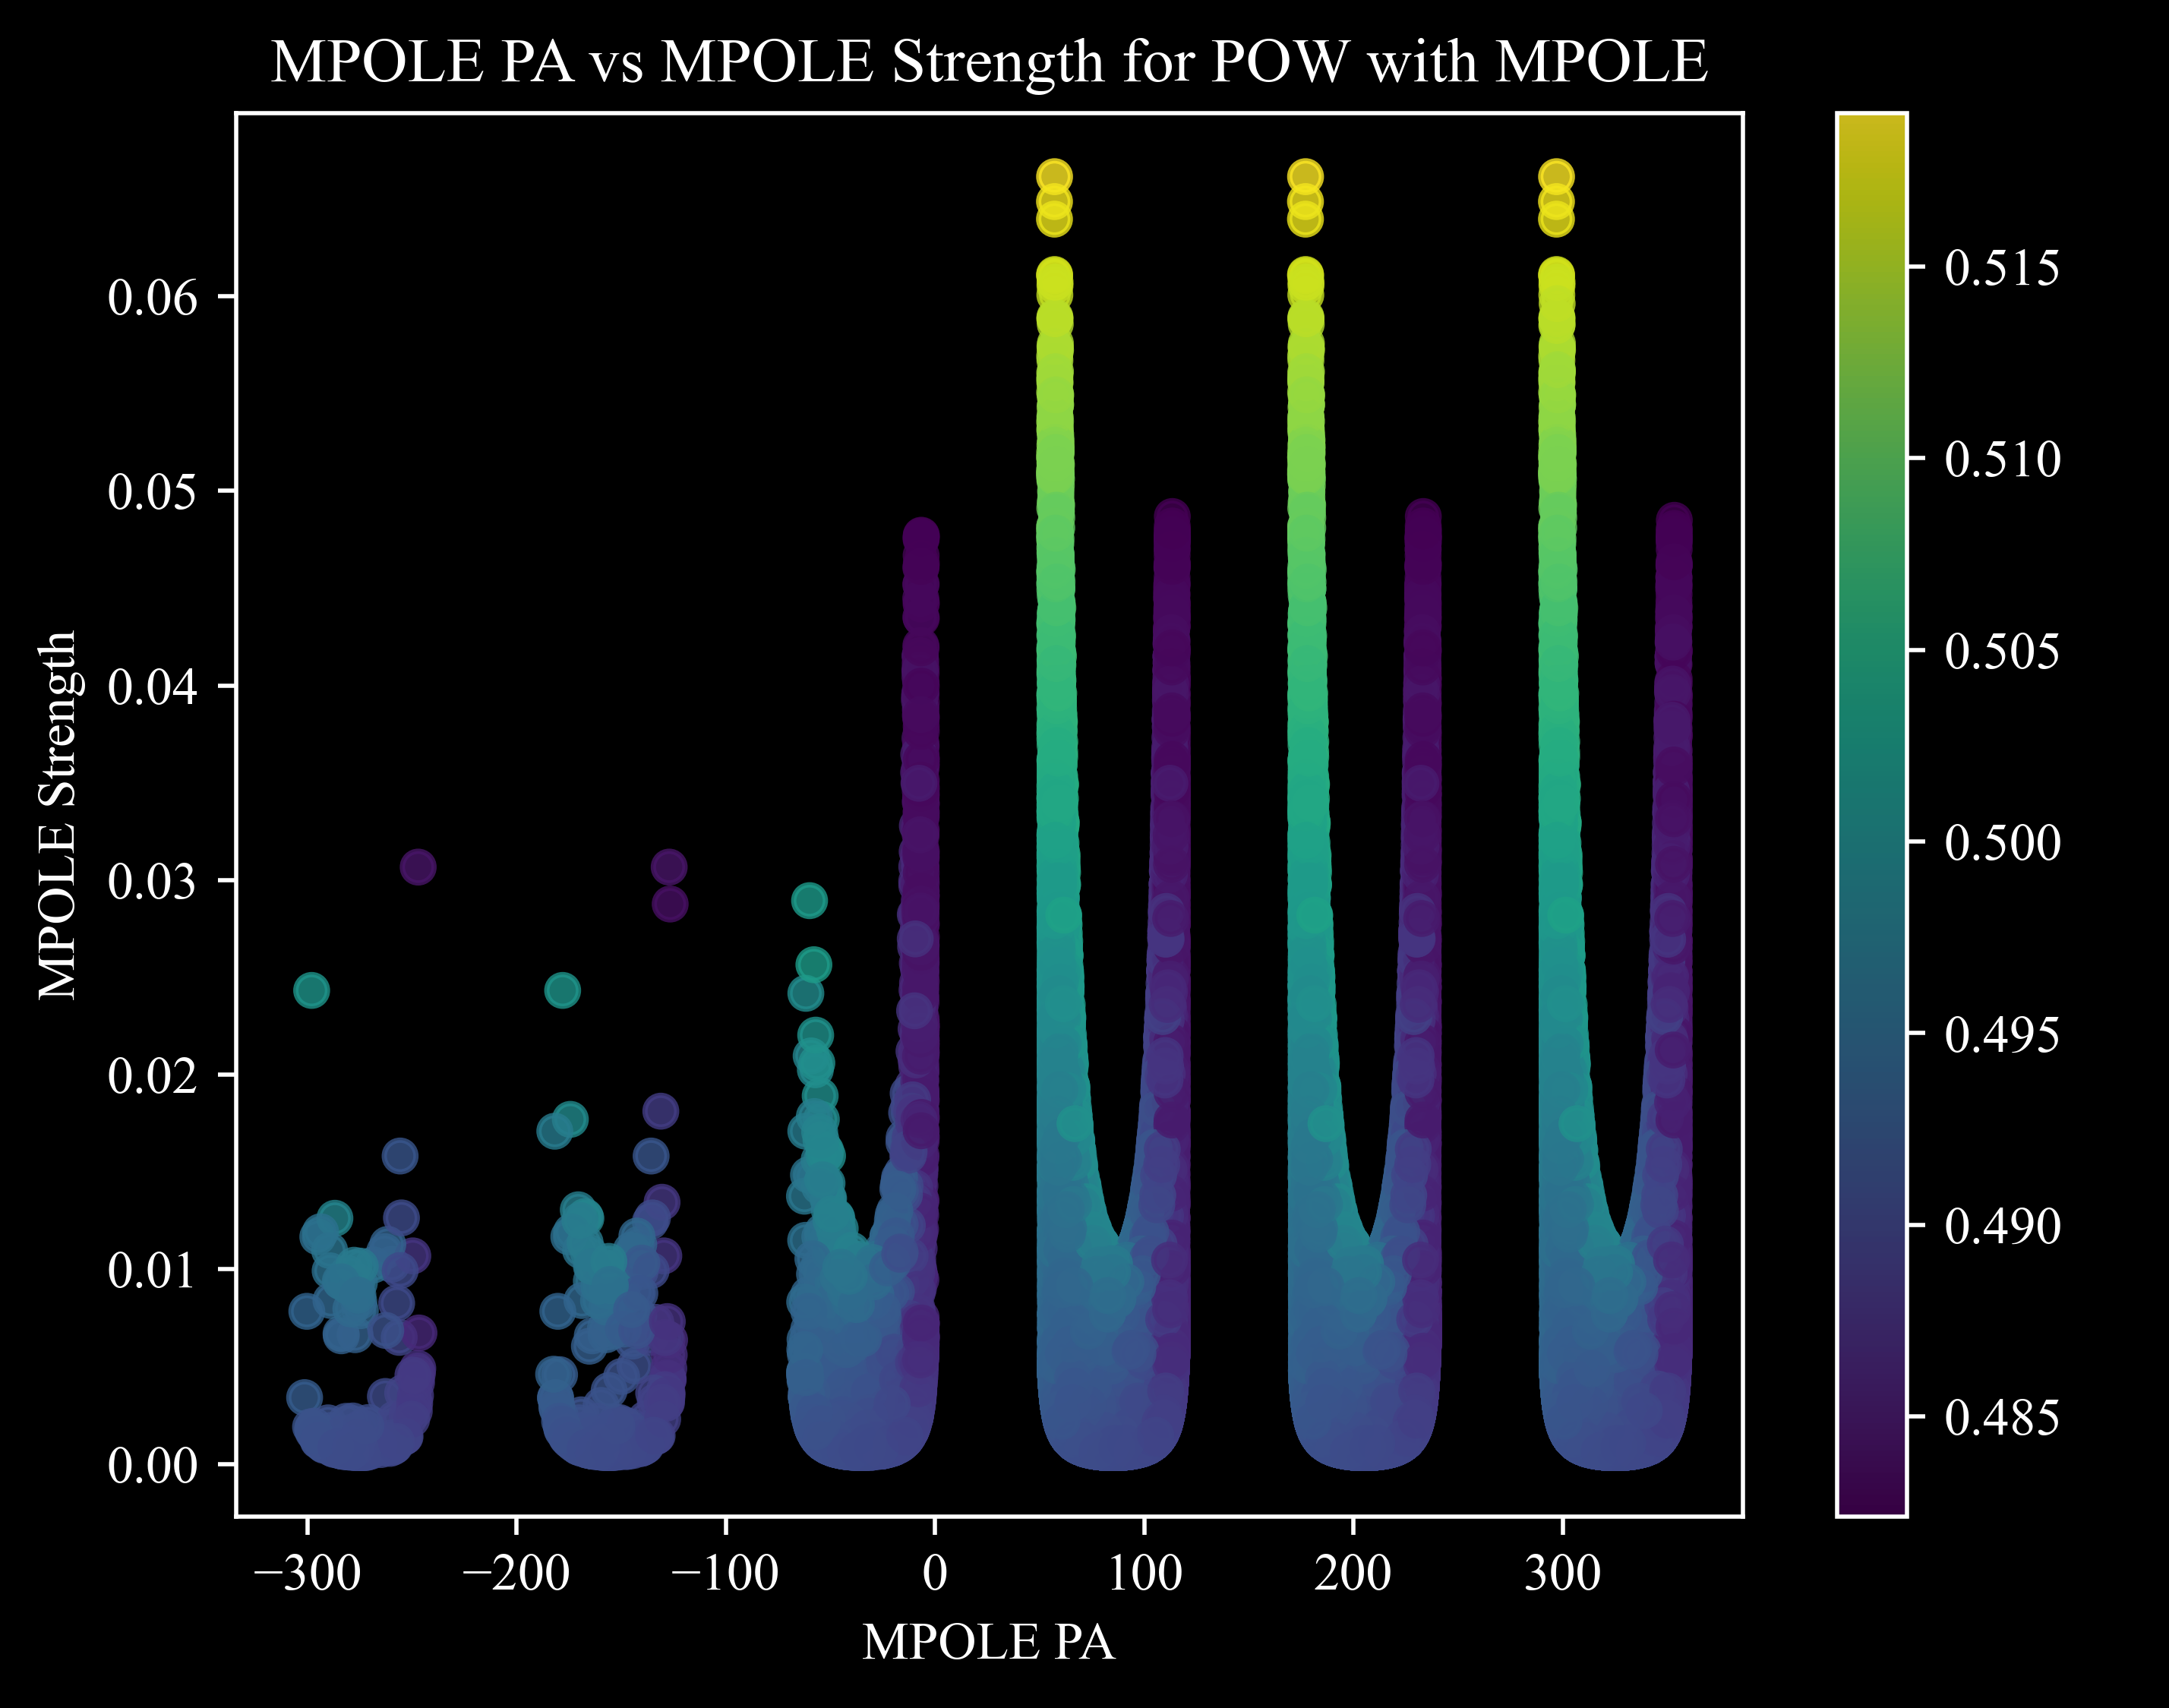

In [18]:
plt.scatter(filtered_df['t_mpole_pa'], filtered_df['t_mpole_str'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Einstein Radius')
plt.xlabel('MPOLE PA', color = 'w')
plt.ylabel('MPOLE Strength', color = 'w')
plt.title('MPOLE PA vs MPOLE Strength for POW with MPOLE')
plt.show()

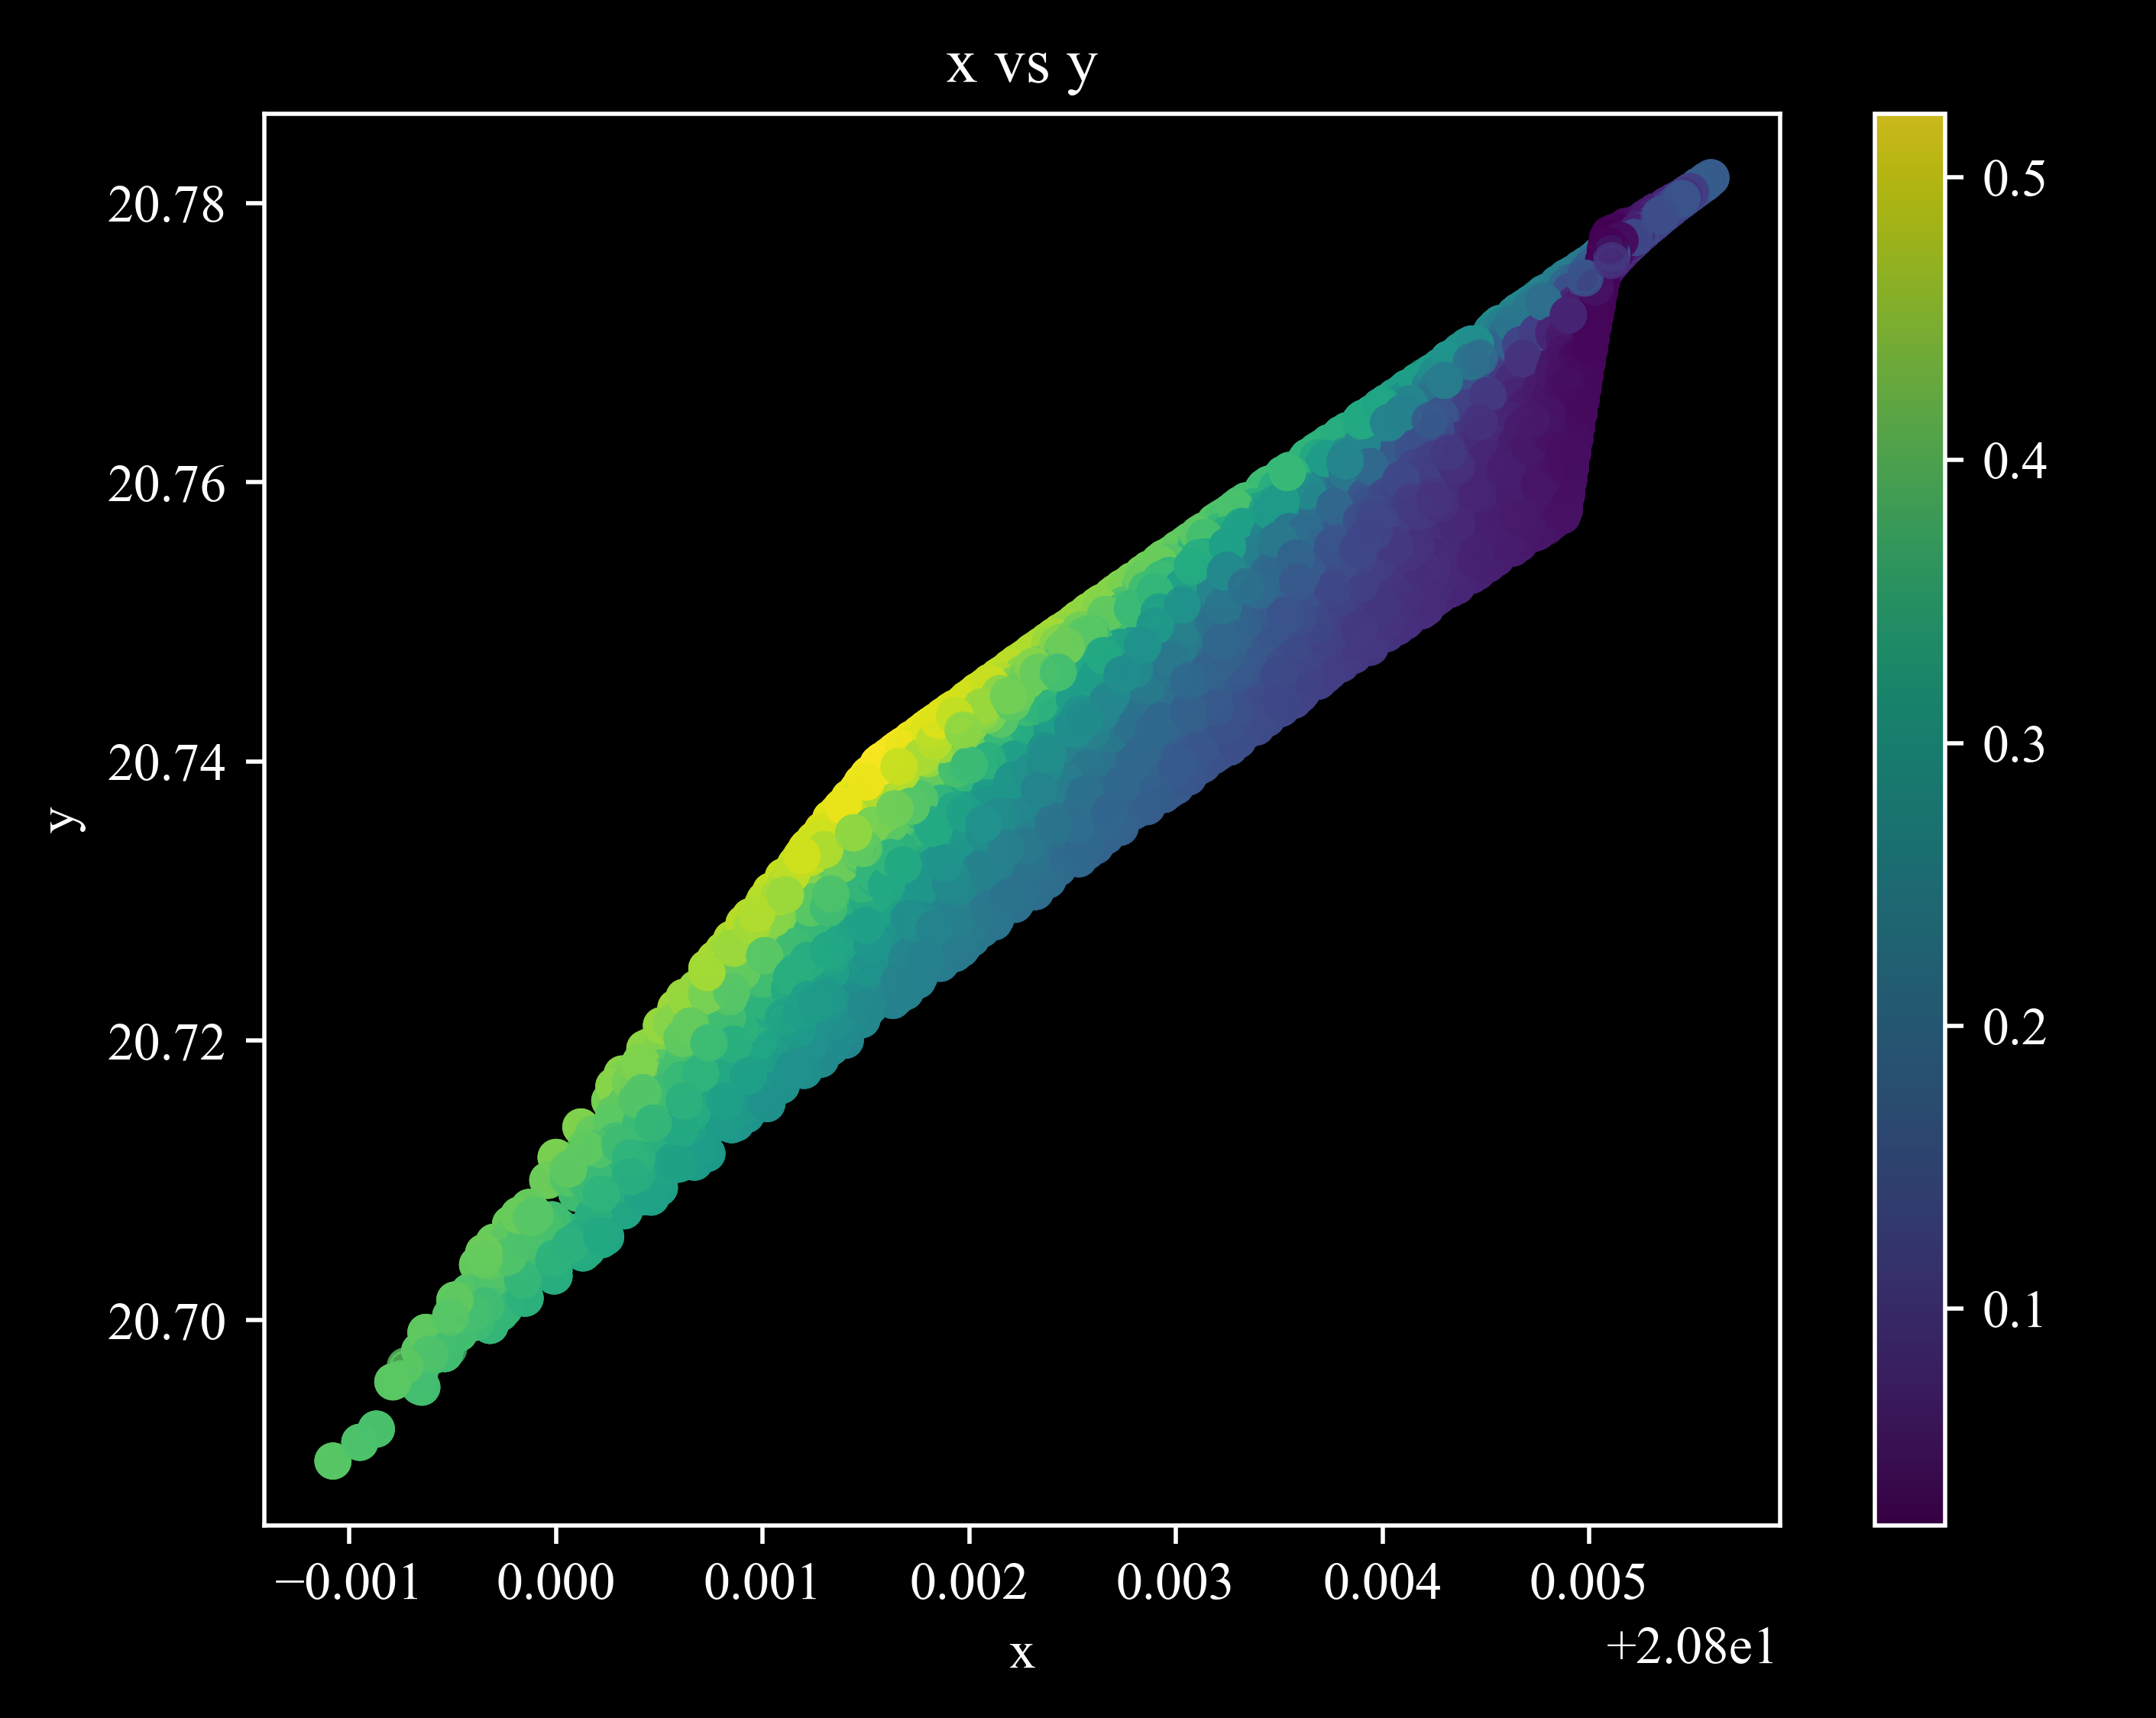

In [19]:
plt.scatter(filtered_df['x'], filtered_df['y'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('y', color = 'w')
plt.title('x vs y')
plt.show()

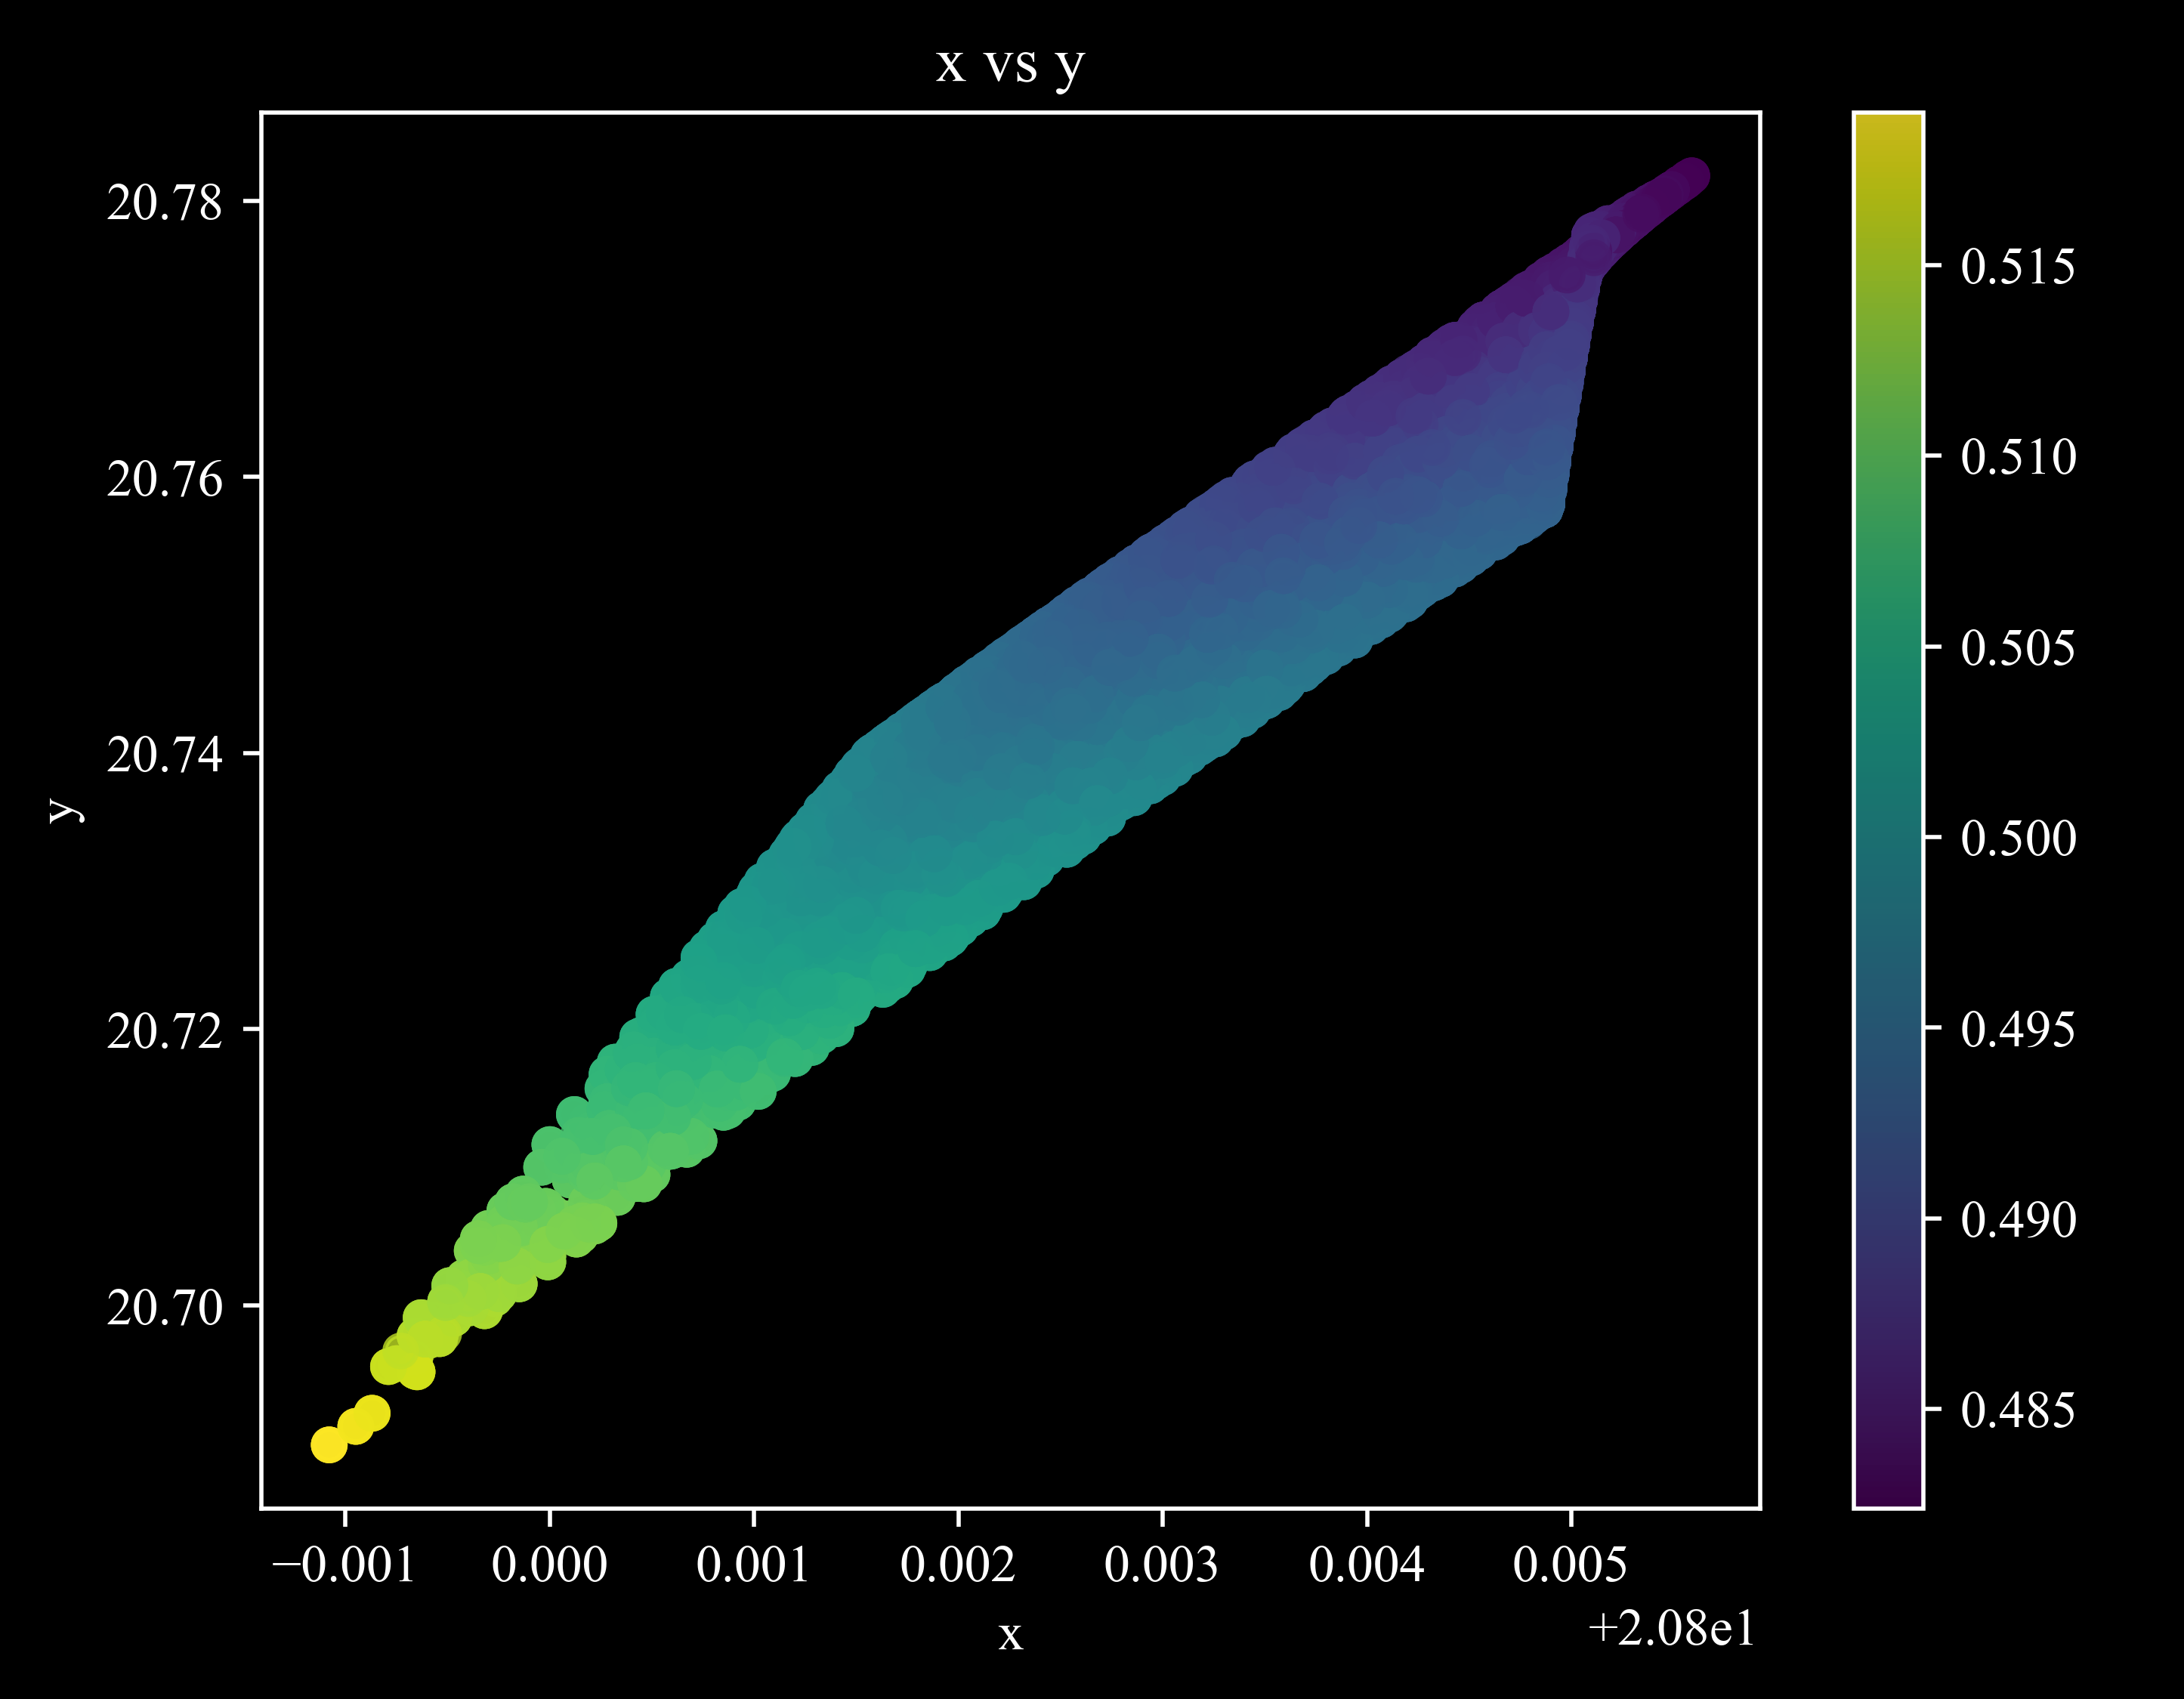

In [20]:
plt.scatter(filtered_df['x'], filtered_df['y'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('y', color = 'w')
plt.title('x vs y')
plt.show()

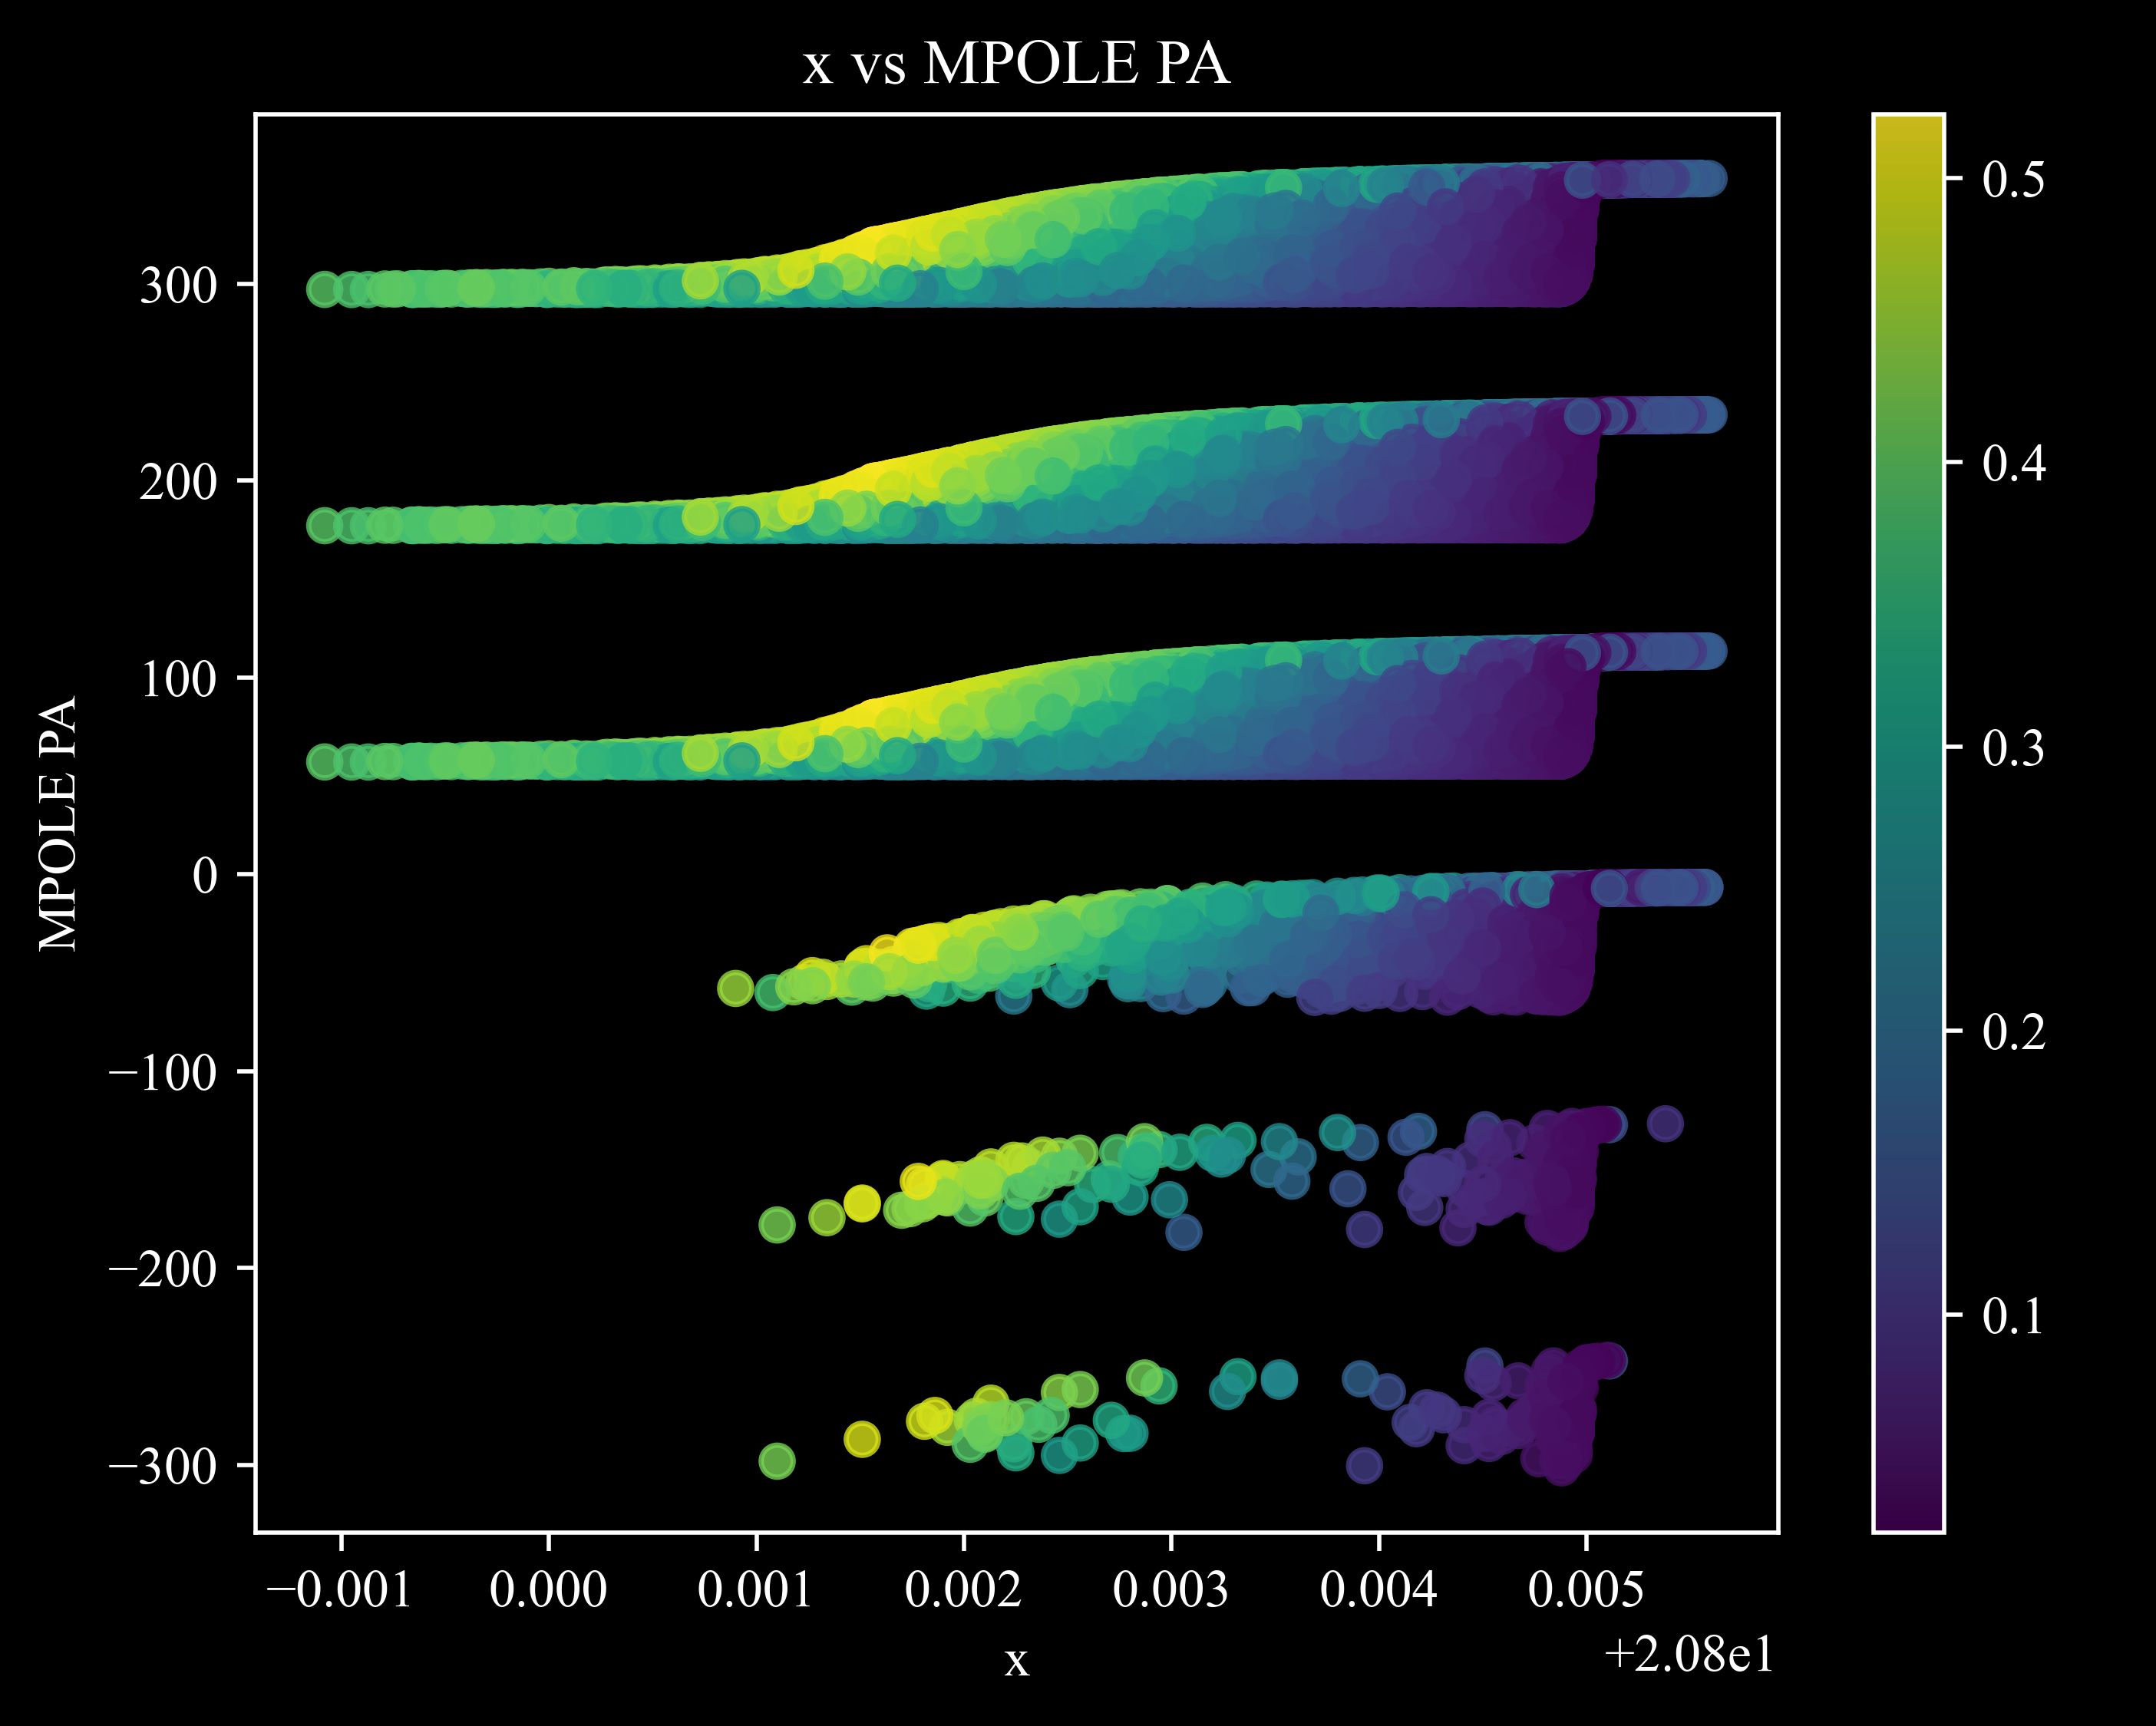

In [21]:
plt.scatter(filtered_df['x'], filtered_df['t_mpole_pa'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('x vs MPOLE PA')
plt.show()

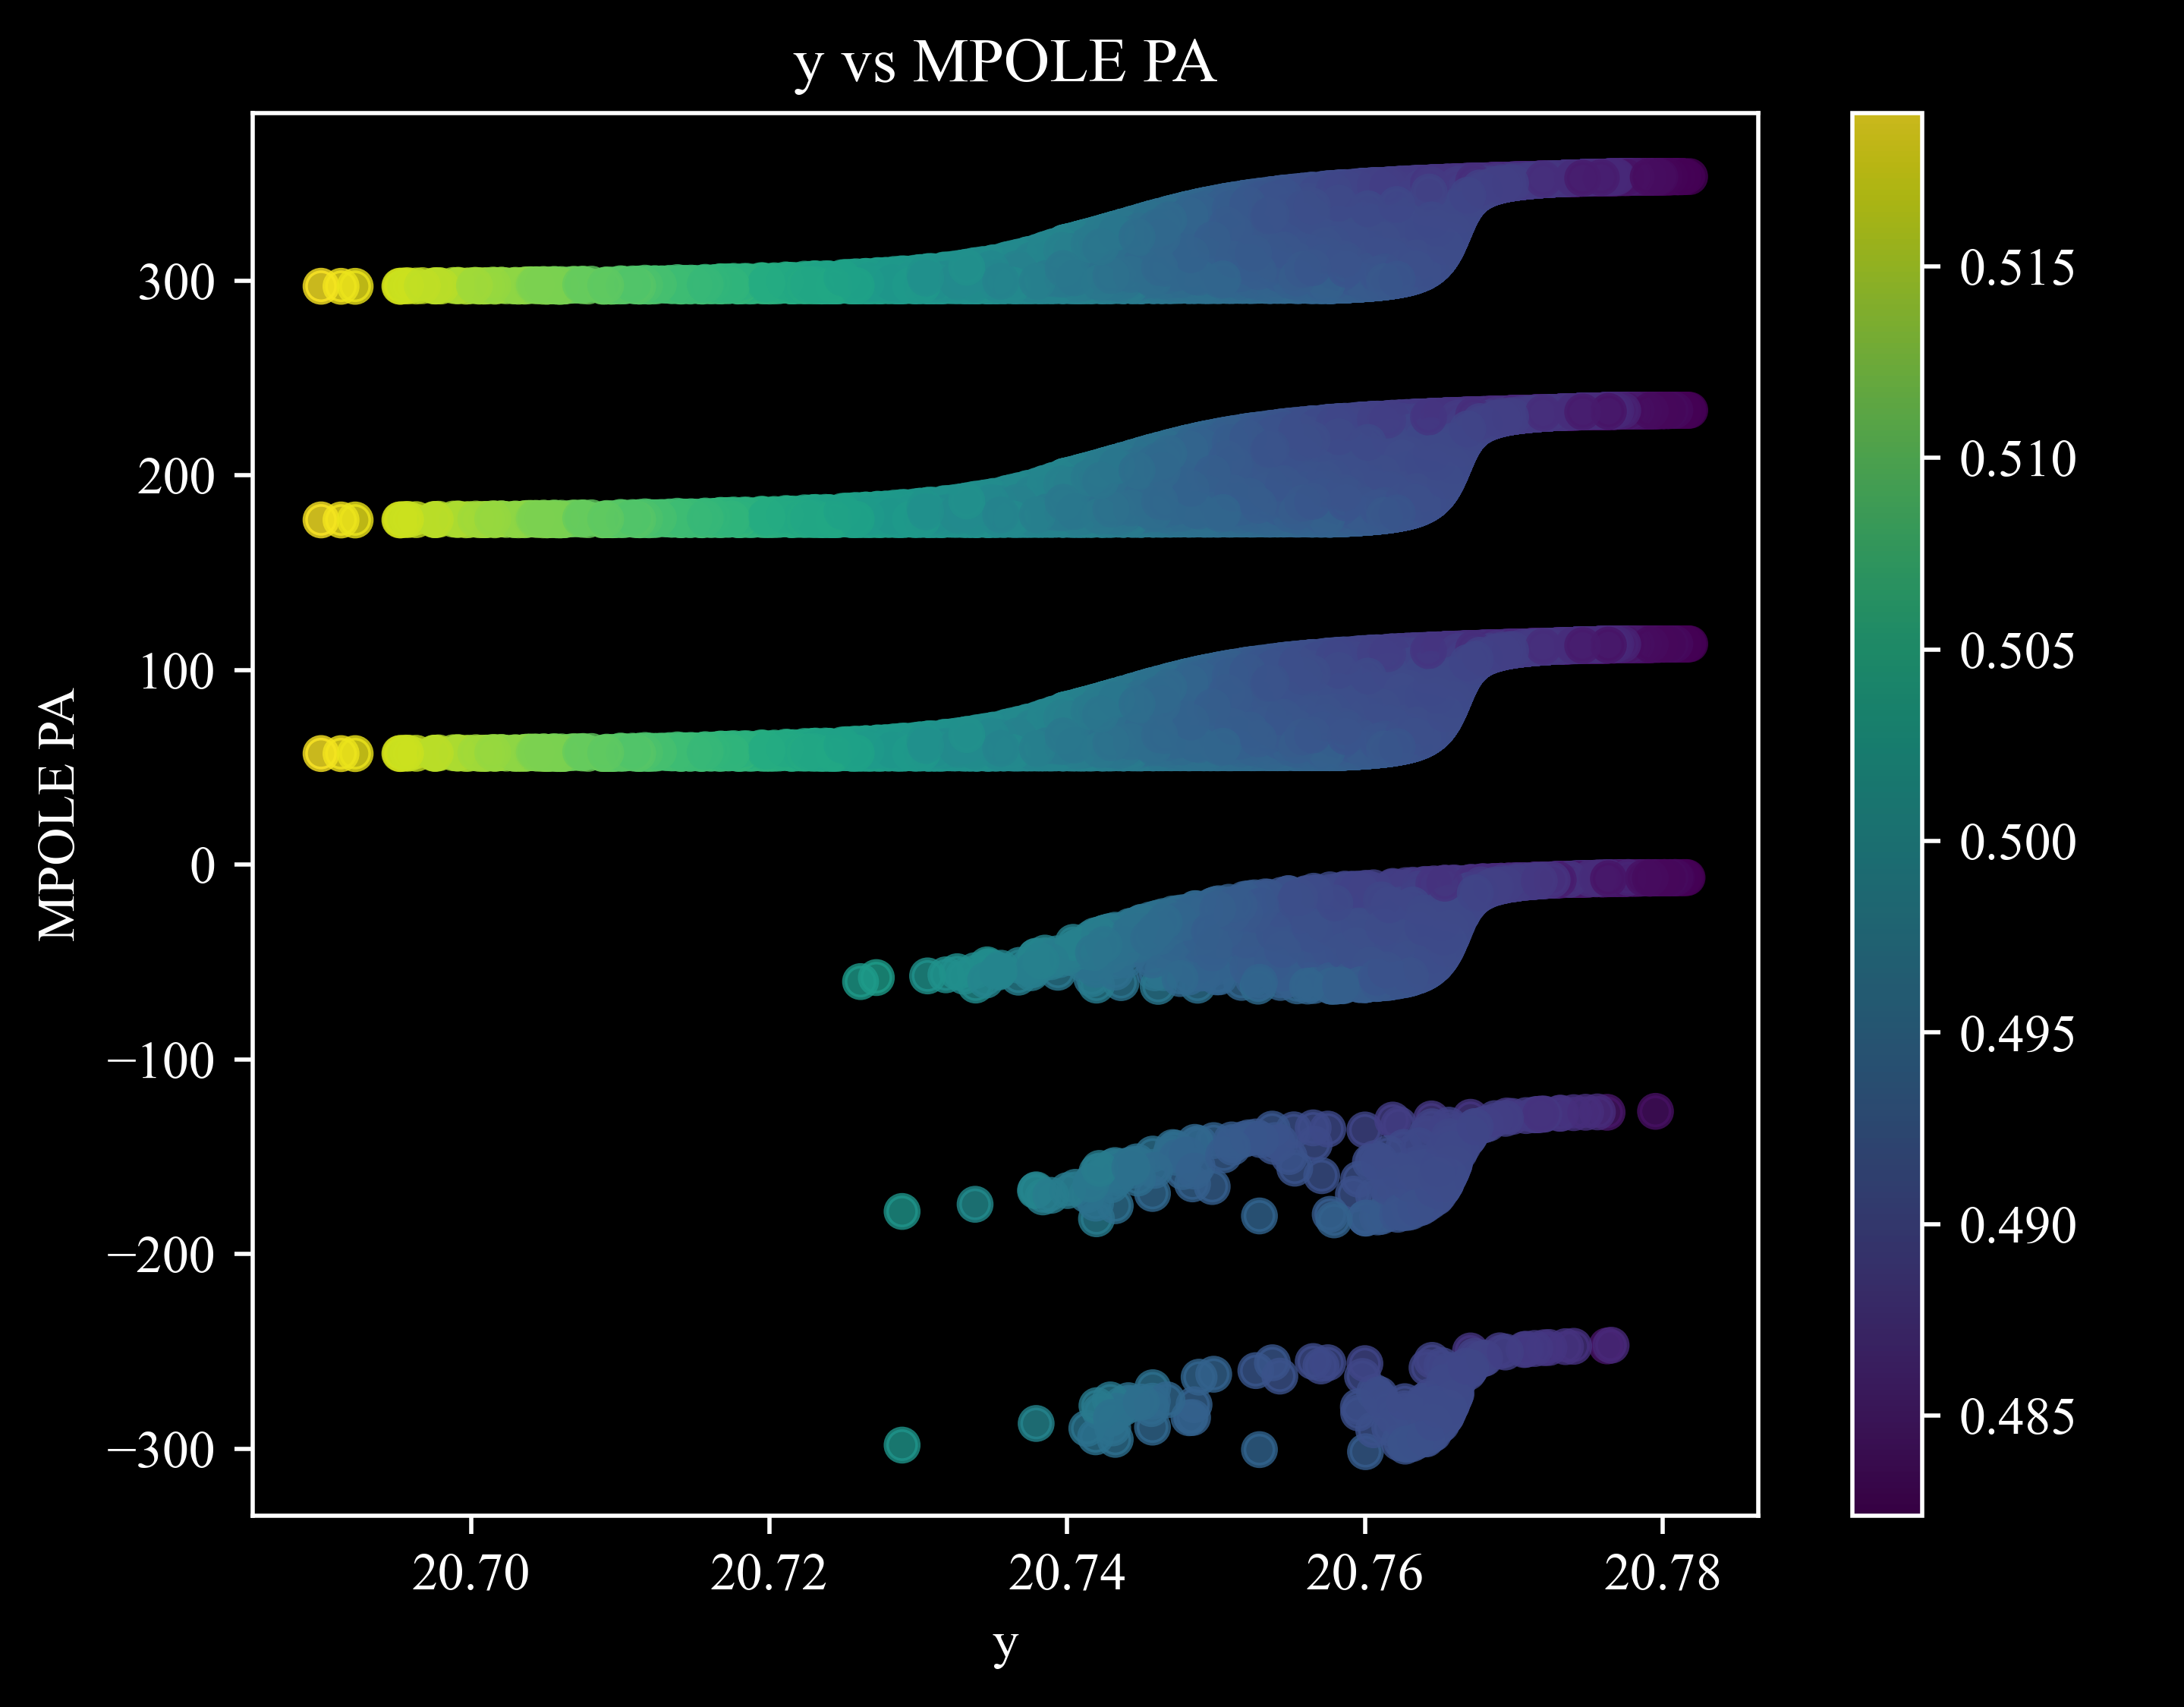

In [22]:
plt.scatter(filtered_df['y'], filtered_df['t_mpole_pa'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('y', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('y vs MPOLE PA')
plt.show()

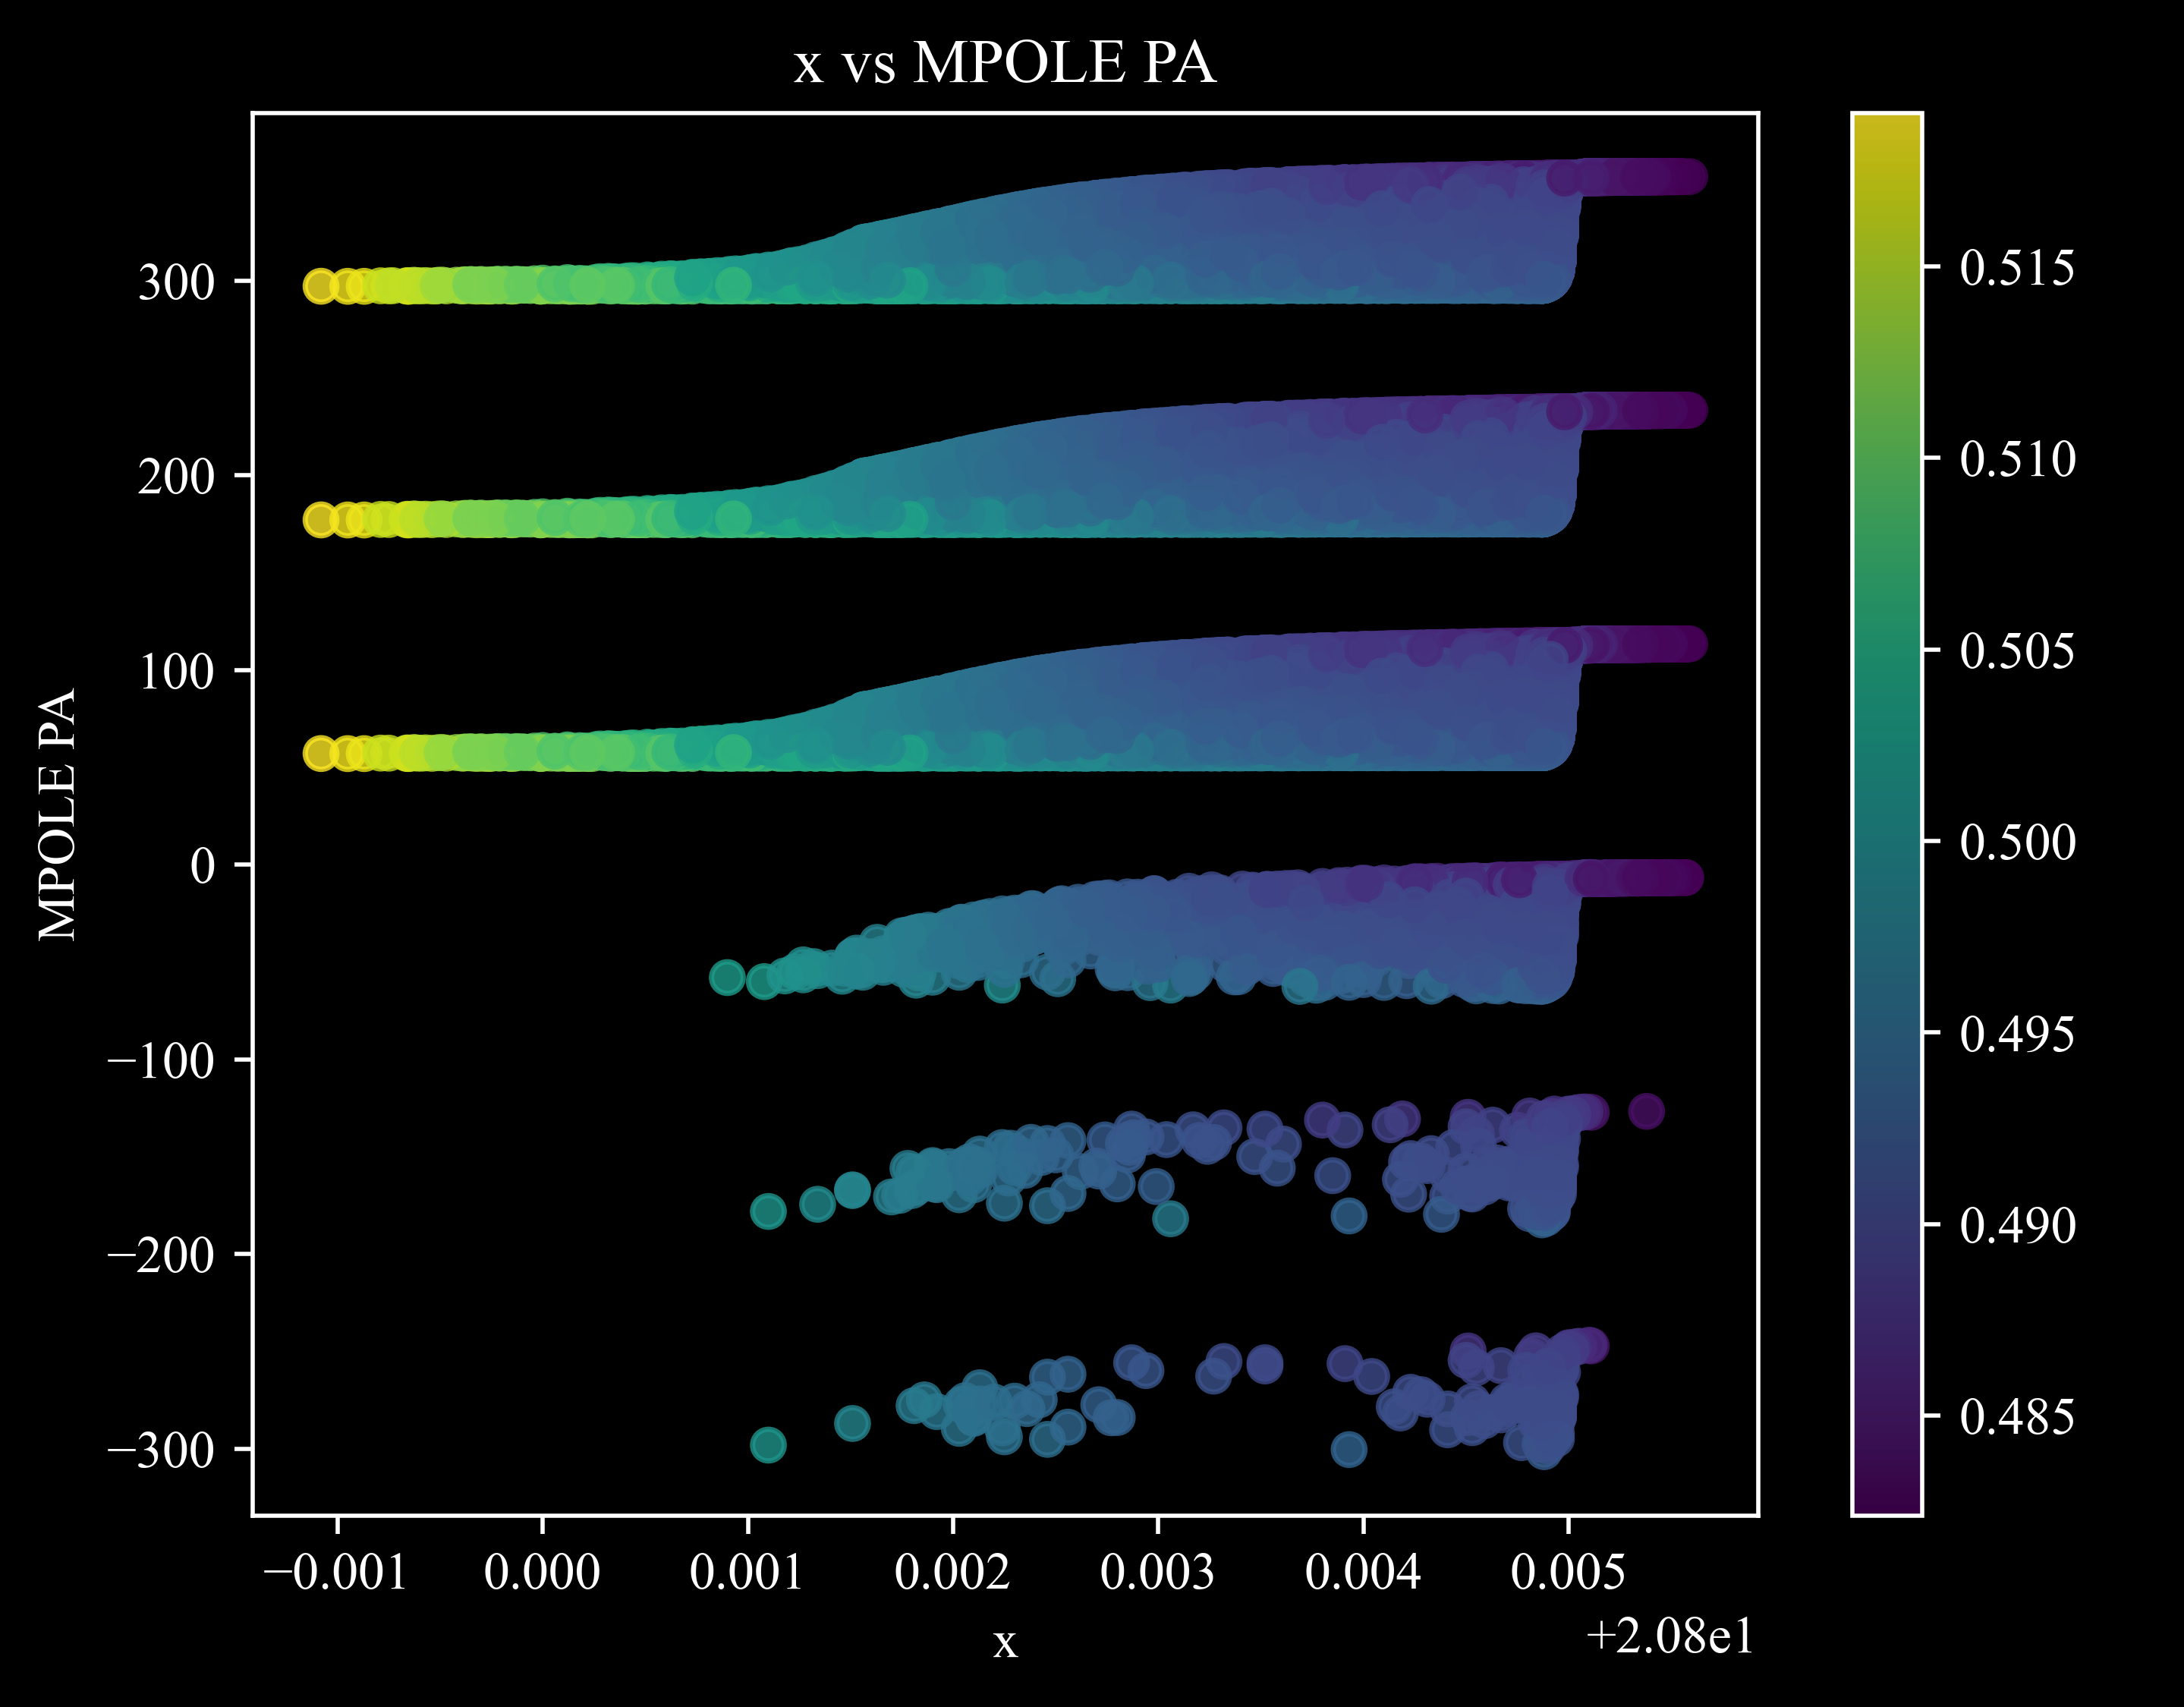

In [23]:
plt.scatter(filtered_df['x'], filtered_df['t_mpole_pa'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Einstein Radius')
plt.xlabel('x', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('x vs MPOLE PA')
plt.show()

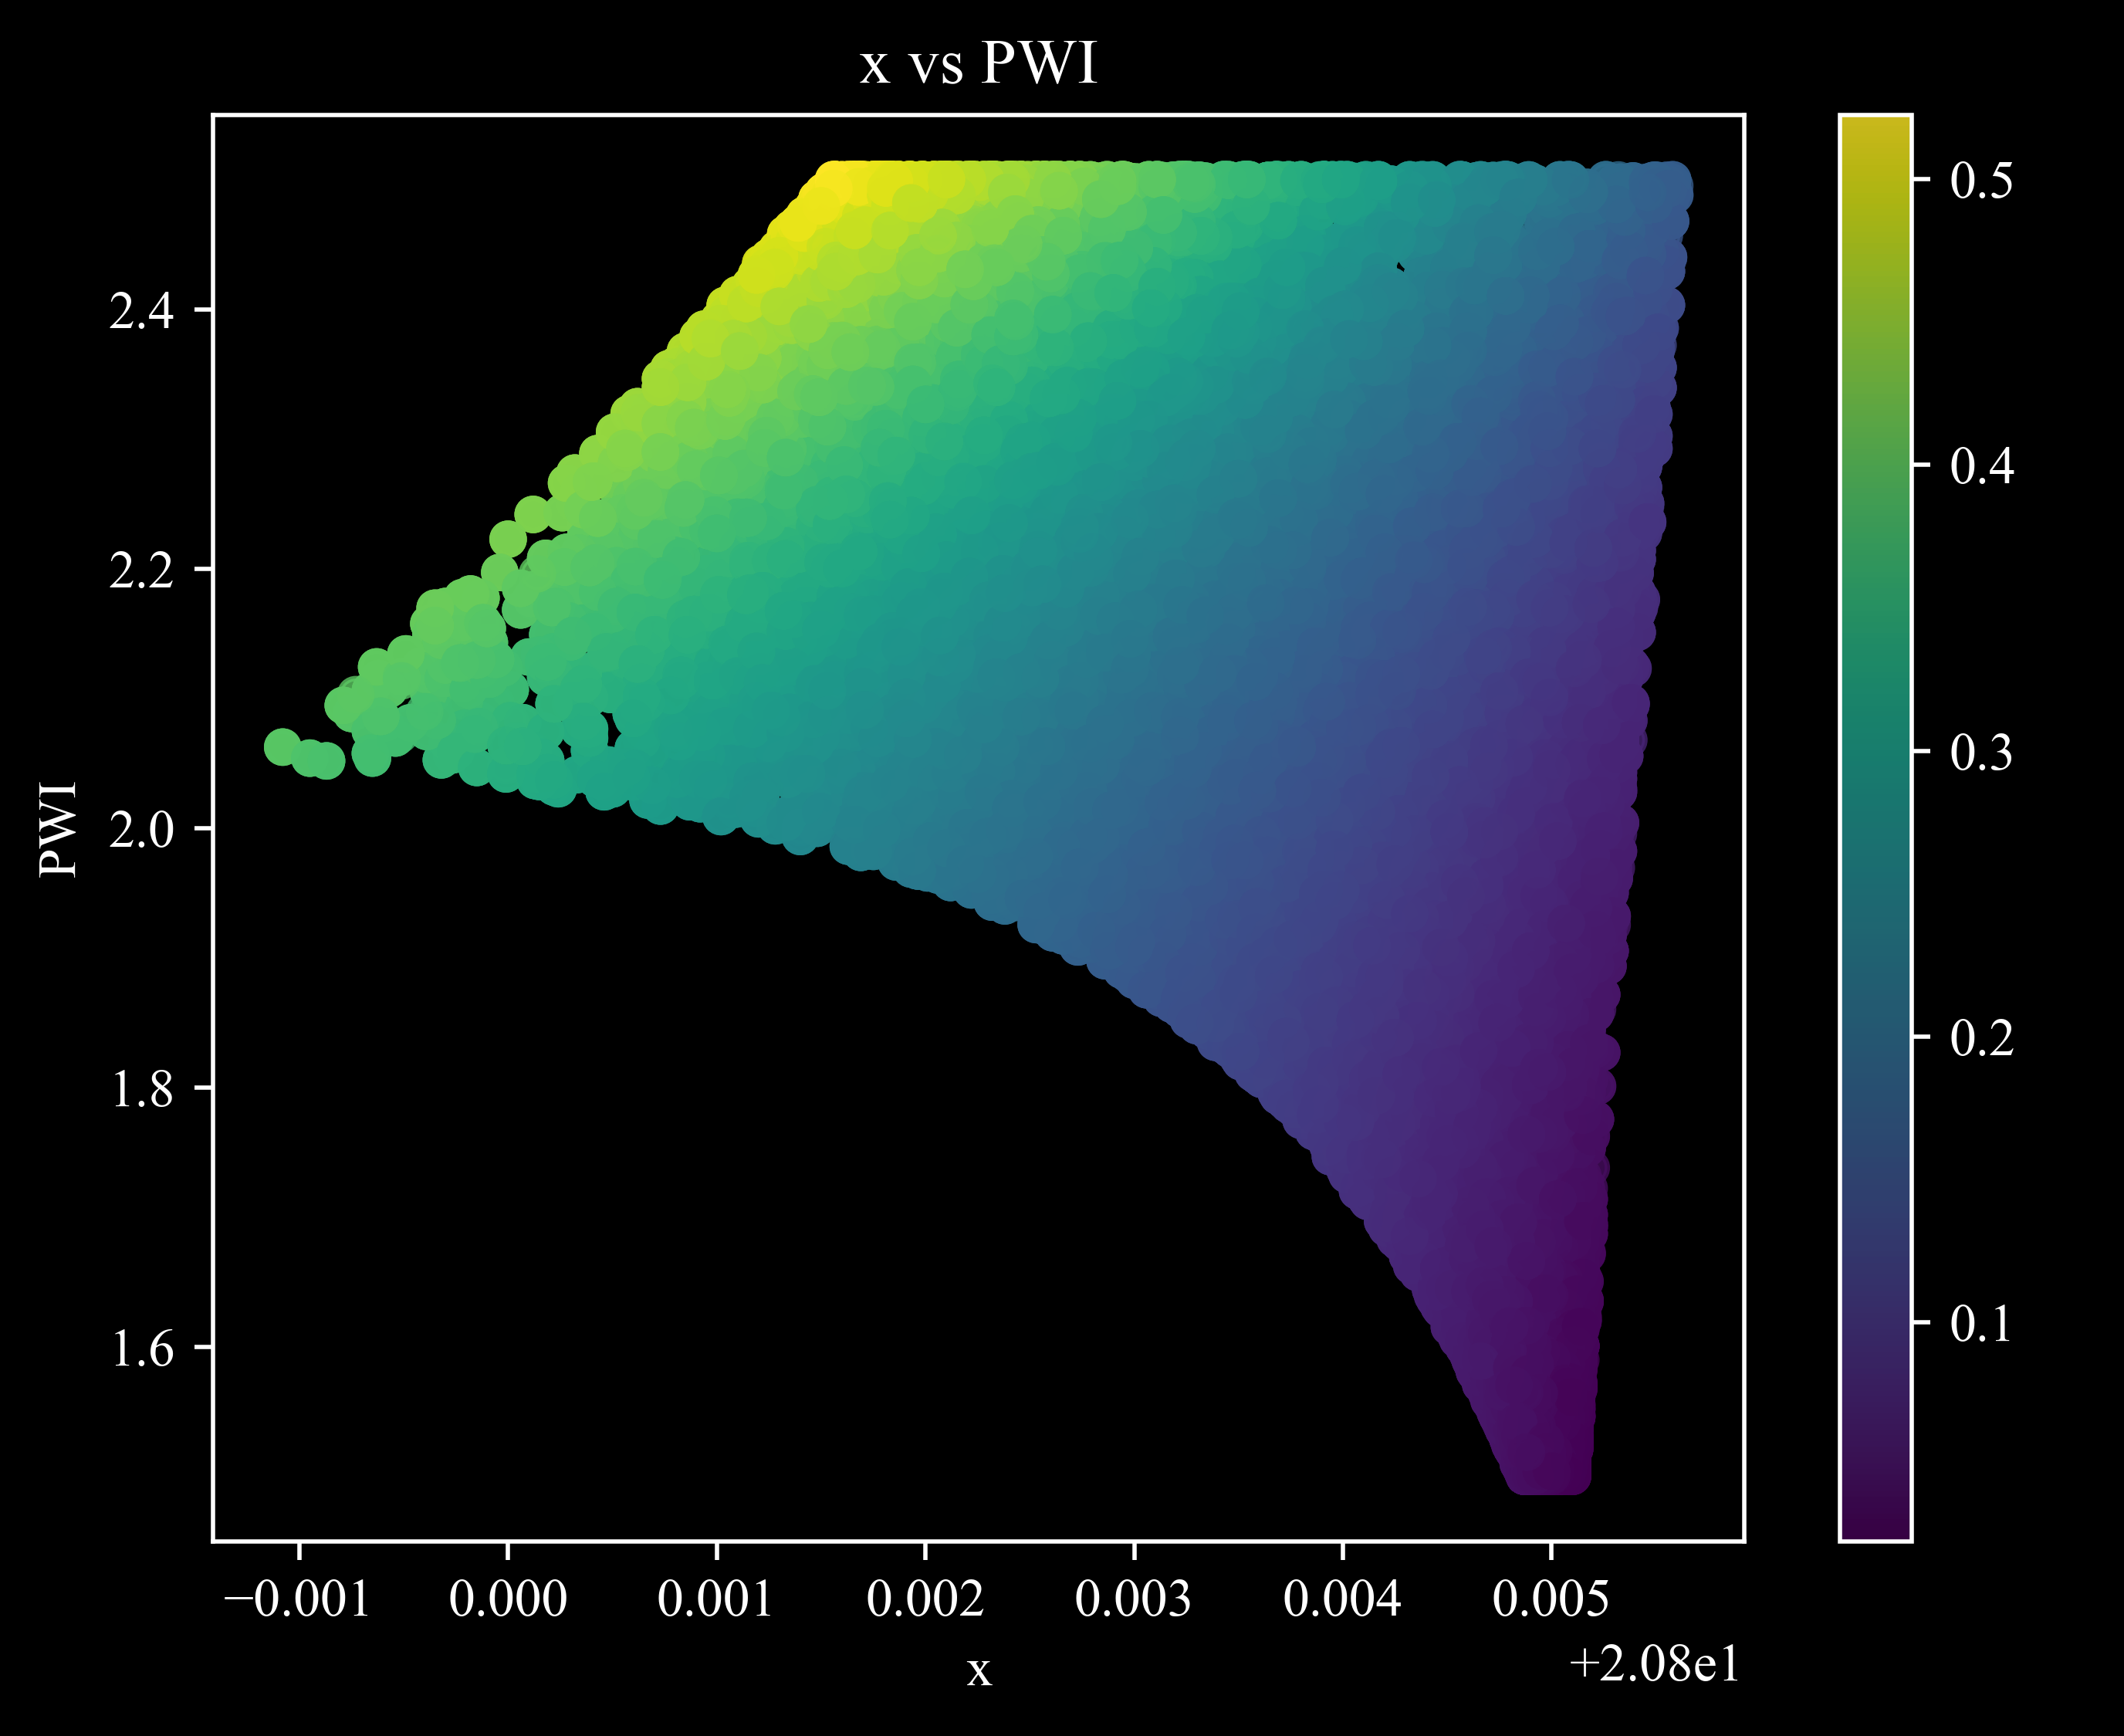

In [24]:
plt.scatter(filtered_df['x'], filtered_df['pwi'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('PWI', color = 'w')
plt.title('x vs PWI')
plt.show()